## Imports and download

In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse


warnings.filterwarnings("ignore")

In [ ]:
!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
!echo '{"username":"punkris","key":"b0bff742fdc1924cfe1807a1b6c032ab"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‚Äò/root/.kaggle‚Äô: File exists


In [ ]:
!cp kaggle.json /root/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
%%capture
!kaggle datasets download -d arashnic/book-recommendation-dataset
!unzip -q book-recommendation-dataset.zip

### –ß—Ç–µ–Ω–∏–µ –∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

In [ ]:
books = books.merge(ratings, on='ISBN')
books = books.merge(users, on='User-ID')
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  User-ID  Book-Rating  \
0  http://images.amazon.com/images/P/0195153448.0...        2            0   
1  http://images.amazon.com/images/P/0002005018.0...        8            5   
2  http://images.amazon.com/images/P/0060973129.0...        8            0   
3  http://images.amazon.com/images/P/0374157065.0...        8            0   
4  http://images.amazon.com/images/P/0393045218.0...        8            0   

                    Location   Age  
0  stockton, california, usa  18.0  
1   timmins, ontario, canada   NaN  
2   timmins, ontario, canada   NaN  
3   timmins, ontario, canada   NaN  
4   timmins, ontario, canada   NaN

In [ ]:
books = books[books['Book-Rating'] != 0]

In [ ]:
books.shape

(383842, 12)

–ò–¥–µ–∏:

* –°–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –∫–Ω–∏–≥–∏ –ø–æ ISBN –∏ –¥–æ–±–∞–≤–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä –æ—Ü–µ–Ω–∏–≤–∞—é—â–∏–π –∫–Ω–∏–≥—É(—Å—Ä–µ–¥–Ω—è—è –æ—Ü–µ–Ω–∫–∞ –∫–Ω–∏–≥–∏, –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å)
* –°–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –°–¥–µ–ª–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä –±–∞–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è

## –ü—Ä–∏–≤–µ–¥—ë–º ISBN –∫ —á–∏—Å–ª–µ–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
books["ISBN"] = le.fit_transform(books["ISBN"])

books.head()

ISBN                                    Book-Title  \
1       39                                  Clara Callan   
9    86701       Where You'll Find Me: And Other Stories   
12  110865                            The Middle Stories   
13  119541                                      Jane Doe   
15  123999  The Witchfinder (Amos Walker Mystery Series)   

             Book-Author Year-Of-Publication                 Publisher  \
1   Richard Bruce Wright                2001     HarperFlamingo Canada   
9            Ann Beattie                2002                  Scribner   
12           Sheila Heti                2004     House of Anansi Press   
13          R. J. Kaiser                1999                Mira Books   
15     Loren D. Estleman                1998  Brilliance Audio - Trade   

                                          Image-URL-S  \
1   http://images.amazon.com/images/P/0002005018.0...   
9   http://images.amazon.com/images/P/074322678X.0...   
12  http://images.amazon.com/images/P/0887841740.0...   
13  http://images.amazon.com/images/P/1552041778.0...   
15  http://images.amazon.com/images/P/1567407781.0...   

                                          Image-URL-M  \
1   http://images.amazon.com/images/P/0002005018.0...   
9   http://images.amazon.com/images/P/074322678X.0...   
12  http://images.amazon.com/images/P/0887841740.0...   
13  http://images.amazon.com/images/P/1552041778.0...   
15  http://images.amazon.com/images/P/1567407781.0...   

                                          Image-URL-L  User-ID  Book-Rating  \
1   http://images.amazon.com/images/P/0002005018.0...        8            5   
9   http://images.amazon.com/images/P/074322678X.0...        8            5   
12  http://images.amazon.com/images/P/0887841740.0...        8            5   
13  http://images.amazon.com/images/P/1552041778.0...        8            5   
15  http://images.amazon.com/images/P/1567407781.0...        8            6   

                    Location  Age  
1   timmins, ontario, canada  NaN  
9   timmins, ontario, canada  NaN  
12  timmins, ontario, canada  NaN  
13  timmins, ontario, canada  NaN  
15  timmins, ontario, canada  NaN

## Train Test Split

In [ ]:
df_train, df_test = train_test_split(books, train_size=0.8)

## –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

### –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º location

#### –ü–æ–ª—É—á–∏–º –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç—Ä–∞–Ω

In [ ]:
countries = df_train['Location'].str.split(', ', expand=True)[2]
countries_count = countries.value_counts()

In [ ]:
print(f'–í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω: {len(countries_count)}')

–í—Å–µ–≥–æ —Å—Ç—Ä–∞–Ω: 313


In [ ]:
def get_deleted_data(series, counts):
  series_count = series.value_counts()
  all_values = len(series_count)
  arr_remained_values = []
  arr_deleted_in_df_fraction = []
  for count in counts:
    del_values = series_count[series_count <= count].index

    remained_values = all_values - len(del_values)
    arr_remained_values.append(remained_values)

    deleted_in_df_fraction =  series.isin(del_values).mean()
    arr_deleted_in_df_fraction.append(deleted_in_df_fraction)
  return arr_remained_values, arr_deleted_in_df_fraction


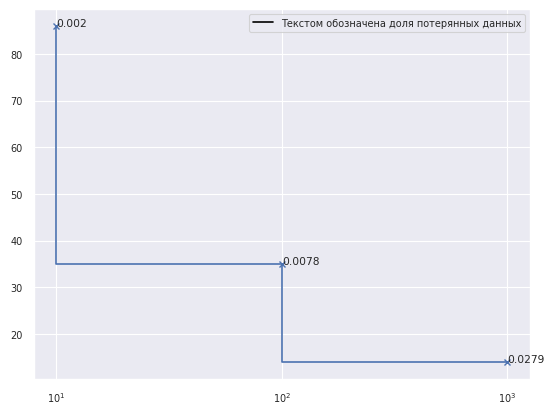

In [ ]:
value_counts = [10, 100, 1000]
remained, deleted_fraction = get_deleted_data(countries, value_counts)
plt.xscale('log')
plt.plot(value_counts, remained, drawstyle='steps', marker='x')
for x, y, text in zip(value_counts, remained, deleted_fraction):
  text = round(text, 4)
  text_data = plt.annotate(text, (x, y))
plt.plot([], [], '', color='black', label='–¢–µ–∫—Å—Ç–æ–º –æ–±–æ–∑–Ω–∞—á–µ–Ω–∞ –¥–æ–ª—è –ø–æ—Ç–µ—Ä—è–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö')
plt.legend()

–í–∏–¥–∏–º, —á—Ç–æ –º–æ–∂–µ–º —É–¥–∞–ª–∏—Ç—å —Å—Ç—Ä–∞–Ω—ã —Å –º–µ–Ω—å—à–µ —á–µ–º 100 –æ—Ç–∑—ã–≤–∞–º–∏ –Ω–∞ –∫–Ω–∏–≥–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –º—ã –æ—Ç—Å–µ–µ–º –º–Ω–æ–≥–æ –ª–∏—à–Ω–∏—Ö —Å—Ç—Ä–∞–Ω, –Ω–æ –ø–æ—Ç–µ—Ä—è–µ–º –≤—Å–µ–≥–æ 0.0035 –¥–∞–Ω–Ω—ã—Ö

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç—Ä–∞–Ω—ã —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–∑—ã–≤–æ–≤–æ > 100, —á—Ç–æ–±—ã —É–±—Ä–∞—Ç—å –æ—à–∏–±–æ—á–Ω—ã–µ

In [ ]:
countries_count[countries_count > 100]

usa                   209769
canada                 28316
united kingdom         11562
germany                 9699
spain                   5674
australia               5588
n/a                     5531
france                  3699
portugal                2788
malaysia                1731
netherlands             1527
switzerland             1521
new zealand             1424
italy                   1228
austria                  850
singapore                595
philippines              433
romania                  369
brazil                   352
iran                     345
ireland                  342
dominican republic       311
sweden                   278
england                  275
finland                  274
belgium                  272
japan                    261
china                    255
norway                   213
argentina                148
mexico                   144
poland                   131
denmark                  113
new york                 109
israel        

–í–∏–¥–∏–º –ø–ª–æ—Ö–∏–µ –¥–∞–Ω–Ω—ã–µ:
n/a, far away..., universe

–ù–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –Ω–∞–∑–≤–∞–Ω–∏–π –ê–º–µ—Ä–∏–∫–∏:us, united states, united state

#### –ò–∑–º–µ–Ω–µ–Ω–∏–µ train –∏ test

–î–æ–±–∞–≤–∏–º countries –≤ train –∏ test

In [ ]:
for df in df_train, df_test:
  df['countries'] = df['Location'].str.split(', ', expand=True)[2]

–ó–∞–º–µ–Ω–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ nan

In [ ]:
remained_countries = set(countries_count[countries_count > 100].index)
remained_countries = remained_countries.difference(['n/a', 'far away...', 'universe'])

def replace_func(x):
  if x in remained_countries:
    return x
  else:
    return np.nan

df_train['countries'] = df_train['countries'].apply(replace_func)
df_test['countries'] = df_test['countries'].apply(replace_func)

In [ ]:
replace_counties = {distorted: 'usa' for distorted in ['us', 'united states', 'united state', 'new york']}
replace_counties['england'] = 'united kingdom'
for df in df_train, df_test:
  df['countries'].replace(replace_counties, inplace=True)

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ na

In [ ]:
print(f'–î–æ–ª—è na –≤ countrie: {df_train["countries"].isna().mean():.2f}')

–î–æ–ª—è na –≤ countrie: 0.05


–î–æ–ª—è na –æ—á–µ–Ω—å –Ω–∏–∑–∫–∞—è. –ó–∞–º–µ–Ω–∏–º na —Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º

In [ ]:
most_freq = df_train['countries'].mode().iloc[0]
for df in [df_train, df_test]:
  df['countries'].fillna(most_freq, inplace=True)

One hot encoding –ø—Ä–∏–º–µ–Ω–∏–º –¥–∞–ª–µ–µ

### –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º Age

–£–¥–∞–ª–∏–º –≤–æ–∑—Ä–∞—Å—Ç –º–µ–Ω—å—à–µ 0 –∏ –±–æ–ª—å—à–µ 100

In [ ]:
replace_func = lambda x: np.nan if (x <= 0 or x >= 100) else x

for df in [df_train, df_test]:
  df['Age'] = df['Age'].apply(replace_func)

#### –û–ø—Ä–µ–¥–µ–ª–∏–º—Å—è —Å na

In [ ]:
print(f'–î–æ–ª—è na –≤ Age: {df_train["Age"].isna().mean():.2f}')

–î–æ–ª—è na –≤ Age: 0.30


1/4 –¥–∞–Ω–Ω—ã—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞

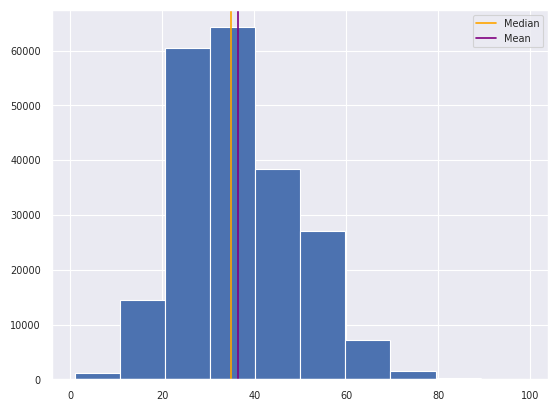

In [ ]:
plt.hist(df_train['Age'])
plt.axvline(df_train['Age'].median(), c='orange', label='Median')
plt.axvline(df_train['Age'].mean(), c='purple', label='Mean')
plt.legend();

–í–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ö–æ–∂–µ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ –∏ –º–µ–¥–∏–∞–Ω–∞ –æ—á–µ–Ω—å –±–ª–∏–∑–∫–æ –∫ —Å—Ä–µ–¥–Ω–µ–º => –º–æ–∂–µ–º –∑–∞–º–µ–Ω–∏—Ç—å na –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ

In [ ]:
mean = df_train['Age'].mean()
for df in [df_train, df_test]:
  df['Age'].fillna(mean, inplace=True)

### –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º Year of publication

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ

In [ ]:
for df in [df_train, df_test]:
  del_year_mask = df['Year-Of-Publication'].isin(['Gallimard', 'DK Publishing Inc'])
  del_indexes = df[del_year_mask].index
  df.drop(del_indexes, inplace=True)
  df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)

(array([4.64200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 3.02428e+05]),
 array([   0.,  205.,  410.,  615.,  820., 1025., 1230., 1435., 1640.,
        1845., 2050.]),
 <BarContainer object of 10 artists>)

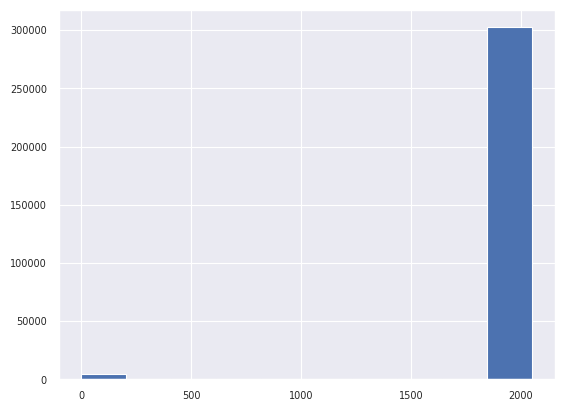

In [ ]:
plt.hist(df_train['Year-Of-Publication'])

–ó–¥–µ—Å—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∫–Ω–∏–≥–∏ —Å 0-–º –≥–æ–¥–æ–º –ø—É–±–ª–∏–∫–∞—Ü–∏–∏. –¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏ —Ç–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –æ—à–∏–±–∫–æ–π, –Ω–æ –æ–Ω–∏ –º–æ–≥—É—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ —Ä–∞–±–æ—Ç—É –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –ú–û

–° –ª–æ–≥–∏—á–µ—Å–∫–æ–π —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –ì–æ–¥–∞ 1400 –∏ 1500 –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è, –Ω–æ 1900 –∏ 2000 —Å–∏–ª—å–Ω–æ, –ø–æ—ç—Ç–æ–º—É –ª–æ–≥–∏—á–Ω–µ–µ –ø—Ä–µ–≤—Ä–∞—Ç–∏—Ç—å –≥–æ–¥ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é


### –ó–∞–º–µ–Ω–∏–º –≥–æ–¥ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [ ]:
df_train['Year-Of-Publication']

676671    2000
819812    1992
365902    2000
1899      2002
604420    1987
          ... 
298531    2003
587562    1994
954892    1990
593778    2001
959128    2001
Name: Year-Of-Publication, Length: 307072, dtype: int64

In [ ]:
def replace_func(x):
  if x >= 2010:
    return '2010'
  elif x>= 2000:
    return '2000'
  elif x >= 1980:
    return '1980'
  elif x>=1950:
    return '1950'
  elif x>= 1900:
    return '1900'
  elif x>=1500:
    return '1500'
  else:
    return '0'

for df in [df_train, df_test]:
  df['Year-Of-Publication'] = df['Year-Of-Publication'].apply(replace_func)

<Axes: xlabel='Year-Of-Publication', ylabel='count'>

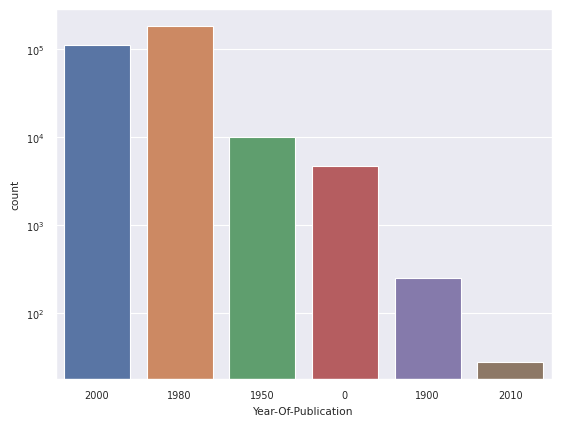

In [ ]:
plt.yscale('log')
sns.countplot(data=df_train, x='Year-Of-Publication')

#### –ü–æ—Å—á–∏—Ç–∞–µ–º None

In [ ]:
print(f"–î–æ–ª—è na –≤ –≥–æ–¥–µ –∏–∑–¥–∞–Ω–∏—è:{df_train['Year-Of-Publication'].isna().mean():.2f}")

–î–æ–ª—è na –≤ –≥–æ–¥–µ –∏–∑–¥–∞–Ω–∏—è:0.00


### Publisher

–ï—Å–ª–∏ –º—ã —É–¥–∞–ª–∏–º –≤—Å–µ –∏–∑–¥–∞–Ω–∏—è –º–µ–Ω—å—à–µ —á–µ–º —Å–æ 100 –æ—Ç–∑—ã–≤–∞–º–∏, —Ç–æ —Å–∫–æ–ª—å–∫–æ –¥–∞–Ω–Ω—ã—Ö –º—ã –ø–æ—Ç–µ—Ä—è–µ–º?

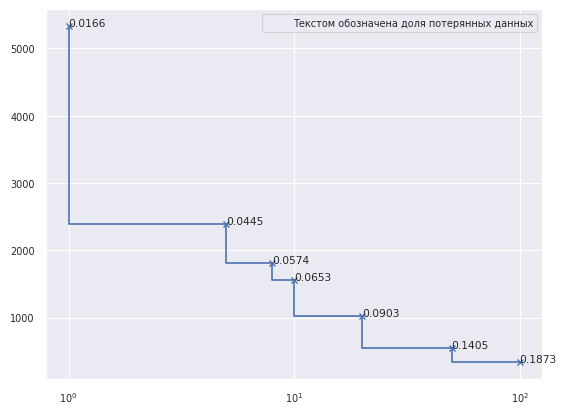

In [ ]:
value_counts = [1, 5, 8, 10, 20, 50, 100]
remained, deleted_fraction = get_deleted_data(df_train['Publisher'], value_counts)
plt.xscale('log')
plt.plot(value_counts, remained, drawstyle='steps', marker='x')
for x, y, text in zip(value_counts, remained, deleted_fraction):
  text = round(text, 4)
  text_data = plt.annotate(text, (x, y))
plt.plot([], [], ' ', label='–¢–µ–∫—Å—Ç–æ–º –æ–±–æ–∑–Ω–∞—á–µ–Ω–∞ –¥–æ–ª—è –ø–æ—Ç–µ—Ä—è–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö')
plt.legend()

–í–∏–¥–∏–º, —á—Ç–æ –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —É–º–µ–Ω—å—à–µ–Ω–∏–µ –¥–æ 3000 –ø—Ä–∏ –ø–æ—Ç–µ—Ä–µ –≤ 3% –º—ã –Ω–µ —Å–º–æ–∂–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å OneHotEncoding –∫ –∏–∑–¥–∞—Ç–µ–ª—å—Å—Ç–≤—É, –ø–æ—ç—Ç–æ–º—É –ª–æ–≥–∏—á–Ω–µ–µ –≤—Å–µ–≥–æ –±—É–¥–µ—Ç –Ω–µ —É–¥–∞–ª—è—Ç—å –∏–∑–¥–∞—Ç–µ–ª—å—Å—Ç–≤–∞, –∞ –ø—Ä–∏–º–µ–Ω–∏—Ç—å TF-IDF

### –ó–∞–º–µ–Ω–∏–º nan

–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ NA

In [ ]:
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ na –≤ publisher: {df_train["Publisher"].isna().sum()}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ na –≤ publisher: 2


–£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å na

In [ ]:
for df in [df_train, df_test]:
  del_rows = df[df['Publisher'].isna()].index
  df.drop(del_rows, inplace=True)

### –î–æ–±–≤–∞–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å–æ —Å—Ä–µ–¥–Ω–∏–º –≤–æ–∑—Ä–∞—Å—Ç–æ–º, –ª—é–¥–µ–π –æ—Å—Ç–∞–≤–∏–≤—à–∏—Ö –æ—Ç–∑—ã–≤

In [ ]:
isbn_mean_age_train = df_train.groupby('ISBN')['Age'].mean().reset_index(name='mean_age')

df_train = df_train.reset_index().merge(isbn_mean_age_train, on='ISBN', how='left').set_index('index')

df_test = df_test.reset_index().merge(isbn_mean_age_train, on='ISBN', how='left').set_index('index')

–î–ª—è —Ç–µ—Ö, —á—Ç–æ –Ω–µ –ø–æ–ø–∞–ª–∏ –≤ df_train –ø–æ—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∏–∑ test

In [ ]:
isbn_mean_age_test = df_test.groupby('ISBN')['Age'].mean().reset_index(name='mean_age_test')
df_test = df_test.reset_index().merge(isbn_mean_age_test, on='ISBN', how='left').set_index('index')

df_test['mean_age'].fillna(df_test['mean_age_test'], inplace=True)
df_test.drop(['mean_age_test'], axis=1, inplace=True)

In [ ]:
df_train.head()

ISBN                                         Book-Title  \
index                                                              
676671  60046                   Heart of the Sea (Irish Trilogy)   
819812  72235                                      The Dark Half   
365902  35796                                      Cryptonomicon   
1899    81868  Grave Secrets (Temperance Brennan Novel (Hardc...   
604420  32049                 Toughing It Out (Crosswinds, No 3)   

             Book-Author Year-Of-Publication     Publisher  \
index                                                        
676671      Nora Roberts                2000    Jove Books   
819812      Stephen King                1980  Viking Books   
365902   Neal Stephenson                2000     Perennial   
1899        Kathy Reichs                2000      Scribner   
604420  Joan Oppenheimer                1980     Harlequin   

                                              Image-URL-S  \
index                                                       
676671  http://images.amazon.com/images/P/0515128554.0...   
819812  http://images.amazon.com/images/P/067082982X.0...   
365902  http://images.amazon.com/images/P/0380788624.0...   
1899    http://images.amazon.com/images/P/0684859734.0...   
604420  http://images.amazon.com/images/P/0373980035.0...   

                                              Image-URL-M  \
index                                                       
676671  http://images.amazon.com/images/P/0515128554.0...   
819812  http://images.amazon.com/images/P/067082982X.0...   
365902  http://images.amazon.com/images/P/0380788624.0...   
1899    http://images.amazon.com/images/P/0684859734.0...   
604420  http://images.amazon.com/images/P/0373980035.0...   

                                              Image-URL-L  User-ID  \
index                                                                
676671  http://images.amazon.com/images/P/0515128554.0...   243720   
819812  http://images.amazon.com/images/P/067082982X.0...    98596   
365902  http://images.amazon.com/images/P/0380788624.0...   250153   
1899    http://images.amazon.com/images/P/0684859734.0...    11676   
604420  http://images.amazon.com/images/P/0373980035.0...   191883   

        Book-Rating                         Location        Age countries  \
index                                                                       
676671            8     hickory, north carolina, usa  36.558352       usa   
819812            9               dallas, texas, usa  34.000000       usa   
365902            8        kingston, ontario, canada  32.000000    canada   
1899             10                    n/a, n/a, n/a  36.558352       usa   
604420           10  mount airy, north carolina, usa  27.000000       usa   

         mean_age  
index              
676671  36.917013  
819812  37.373536  
365902  37.624078  
1899    39.992959  
604420  27.000000

In [ ]:
df_test.head()

ISBN                                         Book-Title  \
index                                                                
1012836  145246                Segunda Fundacion/Second Foundation   
791853    63174                                      The Rana Look   
84530     55931  Dead of Night: The True Story of a Serial Kill...   
598531    43362        The Secret Diary of Adrian Mole Aged 13 3/4   
464288    27758          Chase The Dawn (Harlequin Presents, 1196)   

            Book-Author Year-Of-Publication               Publisher  \
index                                                                 
1012836    Isaac Asimov                1980          Bruguera, S.A.   
791853     SANDRA BROWN                2000                  Bantam   
84530      Don Lasseter                1980              Onyx Books   
598531     Sue Townsend                1980  Methuen Publishing Ltd   
464288   John N. Walker                1980               Harlequin   

                                               Image-URL-S  \
index                                                        
1012836  http://images.amazon.com/images/P/8402048323.0...   
791853   http://images.amazon.com/images/P/0553104241.0...   
84530    http://images.amazon.com/images/P/0451407032.0...   
598531   http://images.amazon.com/images/P/0413537900.0...   
464288   http://images.amazon.com/images/P/0373111967.0...   

                                               Image-URL-M  \
index                                                        
1012836  http://images.amazon.com/images/P/8402048323.0...   
791853   http://images.amazon.com/images/P/0553104241.0...   
84530    http://images.amazon.com/images/P/0451407032.0...   
598531   http://images.amazon.com/images/P/0413537900.0...   
464288   http://images.amazon.com/images/P/0373111967.0...   

                                               Image-URL-L  User-ID  \
index                                                                 
1012836  http://images.amazon.com/images/P/8402048323.0...   265051   
791853   http://images.amazon.com/images/P/0553104241.0...   107865   
84530    http://images.amazon.com/images/P/0451407032.0...   123981   
598531   http://images.amazon.com/images/P/0413537900.0...   225232   
464288   http://images.amazon.com/images/P/0373111967.0...    25981   

         Book-Rating                                  Location        Age  \
index                                                                       
1012836            7  palma de mallorca, islas baleares, spain  40.000000   
791853             8                       tampa, florida, usa  36.558352   
84530              7                     phoenix, arizona, usa  46.000000   
598531             8        sydney, new south wales, australia   4.000000   
464288             5                       nj, new jersey, usa  36.558352   

         countries   mean_age  
index                          
1012836      spain  40.000000  
791853         usa  42.519451  
84530          usa  48.000000  
598531   australia  33.657248  
464288         usa  36.558352

### na –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö

In [ ]:
df_train.name = 'train'
df_test.name = 'test'
for df in [df_train, df_test]:
  print(df.name)
  for col in ['Book-Title', 'Book-Author', 'Publisher']:
    print(f"\t{col}: {df[col].isna().sum()}")

train
	Book-Title: 0
	Book-Author: 1
	Publisher: 0
test
	Book-Title: 0
	Book-Author: 0
	Publisher: 0


In [ ]:
df_train.dropna(axis=0, inplace=True)

In [ ]:
for df in df_train, df_test:
  print(f'{df.name} na:')
  display(df.isna().sum())

train na:


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
countries              0
mean_age               0
dtype: int64

test na:


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
countries              0
mean_age               0
dtype: int64

### –£–¥–∞–ª–∏–º —Å—Ç–æ–ª–±—Ü—ã

In [ ]:
delete_cols = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Location']

In [ ]:
for df in [df_train, df_test]:
  df.drop(delete_cols, axis=1, inplace=True)

In [ ]:
df_train.head()

ISBN                                         Book-Title  \
index                                                              
676671  60046                   Heart of the Sea (Irish Trilogy)   
819812  72235                                      The Dark Half   
365902  35796                                      Cryptonomicon   
1899    81868  Grave Secrets (Temperance Brennan Novel (Hardc...   
604420  32049                 Toughing It Out (Crosswinds, No 3)   

             Book-Author Year-Of-Publication     Publisher  User-ID  \
index                                                                 
676671      Nora Roberts                2000    Jove Books   243720   
819812      Stephen King                1980  Viking Books    98596   
365902   Neal Stephenson                2000     Perennial   250153   
1899        Kathy Reichs                2000      Scribner    11676   
604420  Joan Oppenheimer                1980     Harlequin   191883   

        Book-Rating        Age countries   mean_age  
index                                                
676671            8  36.558352       usa  36.917013  
819812            9  34.000000       usa  37.373536  
365902            8  32.000000    canada  37.624078  
1899             10  36.558352       usa  39.992959  
604420           10  27.000000       usa  27.000000

## –†–∞–∑–±–∏–≤–∞–µ–º —Å—Ç—Ä–∞–Ω—ã –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏

In [ ]:
counties_counts = df_train['countries'].value_counts()

In [ ]:
sns.set_context('paper', font_scale=0.8)

<Axes: xlabel='count', ylabel='countries'>

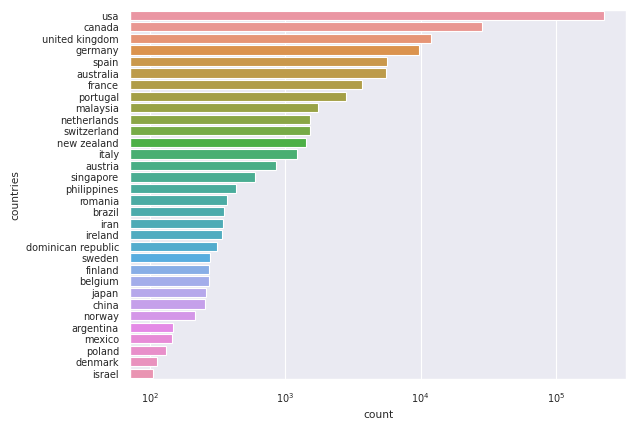

In [ ]:
plt.xscale('log')
sns.countplot(data=df_train, y='countries', order=counties_counts.index)

In [ ]:
counties_lvl = np.log10(counties_counts).astype(int).to_frame('country_lvl')
counties_lvl.head()

country_lvl
usa                       5
canada                    4
united kingdom            4
germany                   3
spain                     3

In [ ]:
df_train = df_train.merge(counties_lvl, left_on='countries', right_index=True, how='left')
df_test = df_test.merge(counties_lvl, left_on='countries', right_index=True, how='left')
df_train.head()

ISBN                                         Book-Title  \
index                                                              
676671  60046                   Heart of the Sea (Irish Trilogy)   
819812  72235                                      The Dark Half   
365902  35796                                      Cryptonomicon   
1899    81868  Grave Secrets (Temperance Brennan Novel (Hardc...   
604420  32049                 Toughing It Out (Crosswinds, No 3)   

             Book-Author Year-Of-Publication     Publisher  User-ID  \
index                                                                 
676671      Nora Roberts                2000    Jove Books   243720   
819812      Stephen King                1980  Viking Books    98596   
365902   Neal Stephenson                2000     Perennial   250153   
1899        Kathy Reichs                2000      Scribner    11676   
604420  Joan Oppenheimer                1980     Harlequin   191883   

        Book-Rating        Age countries   mean_age  country_lvl  
index                                                             
676671            8  36.558352       usa  36.917013            5  
819812            9  34.000000       usa  37.373536            5  
365902            8  32.000000    canada  37.624078            4  
1899             10  36.558352       usa  39.992959            5  
604420           10  27.000000       usa  27.000000            5

## –†–∞–±–æ—Ç–∞–µ–º —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –∏ —Ç–µ–∫—Å—Ç–æ–º

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import  Pipeline
from scipy import sparse


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### –ù–∞–π–¥–µ–º —Å—Ç–æ–ø—Å–ª–æ–≤–∞ –¥–ª—è Publisher

–î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–∞–º—ã–µ —á–∞—Å—Ç–æ–≤—Å—Ç—Ä–µ—á–∞–µ–º—ã–µ —Å–ª–æ–≤–∞

In [ ]:
punct = set(string.punctuation + "‚Äî" + "¬´" + "¬ª")
eng_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

def basic_tokenizer(inp_str):
  inp_str = inp_str.lower()
  tokenized = [token for token in word_tokenize(inp_str)
               if (token not in punct) and (token not in eng_stopwords)]
  return tokenized

In [ ]:
word_appearance = defaultdict(int)
for publisher in df_train['Publisher'].sample(100000):
  tokenized = basic_tokenizer(publisher)
  for word in set(tokenized):
    word_appearance[word] += 1

In [ ]:
word_appearance = pd.Series(word_appearance)
word_appearance.sort_values(ascending=False)

books         27484
publishing     7112
press          5557
bantam         4631
group          4435
              ...  
i.p.a.c.s         1
maryland          1
evergreen         1
wong              1
seabury           1
Length: 4967, dtype: int64

In [ ]:
additional_stopwords = {'books', 'publishing', 'group', 'press', 'company', "'s", 'house', 'book', 'pub', 'inc', 'ltd'}
publisher_stopwords = list(eng_stopwords.union(additional_stopwords))


### Book-Title Glove

In [ ]:
import gensim.downloader
vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [ ]:
vectors['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ], dtype=float32)

In [ ]:
print("Num words:", len(vectors))

Num words: 400000


In [ ]:
def get_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
get_dist(vectors['king'], vectors['queen'])

3.477756

In [ ]:
get_dist(vectors['apple'], vectors['rocket'])

7.0061626

In [ ]:
class GensimTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.vectors = vectors
    self.vector_size = self.vectors.vector_size

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    res_matrix = np.zeros([len(X), self.vector_size])
    for row, inp_str in enumerate(X):
      tokenized = basic_tokenizer(inp_str)
      vectorized_tokens = 1
      for token in tokenized:
        if token in self.vectors:
          vector = self.vectors[token]
          res_matrix[row] += vector
          vectorized_tokens += 1
      res_matrix[row] /= vectorized_tokens
    return res_matrix

g = GensimTransformer()
trasform_res = g.fit_transform(df_train['Book-Title'].iloc[:1000])


## –ù–∞–ø–∏—à–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –≤—Å–µ—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

In [ ]:
scaler_transformer = ColumnTransformer(
    [
        ('scaler',  StandardScaler(), ['Age', 'mean_age'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

scaler_transformer.set_output(transform='pandas')

text_transformer = ColumnTransformer([
#        ('glove', GensimTransformer(), 'Book-Title'),
#        ('tf-idf',TfidfVectorizer(max_features=3000, stop_words=publisher_stopwords), 'Publisher'),
#        ('bag_of_words', CountVectorizer(max_features=3000), 'Book-Author'),
        ('onehot', OneHotEncoder(), ['countries', 'Year-Of-Publication'])
    ],
    remainder='passthrough'
)

normalizer = Normalizer()

pipline = Pipeline([
    ('scaler', scaler_transformer),
    ('text_transformer',  text_transformer),
#    ('normalizer', normalizer)
])

In [ ]:
def get_transform_data(X, y, fit: bool = True, save_as: str = None):
    if fit:
        X = pipline.fit_transform(X)
    else:
        X = pipline.transform(X)

    if save_as:
        sparse.save_npz(f"X_{save_as}.npz", X)
        y.to_csv(f'y_{save_as}.csv')

    return X

In [ ]:
def split_X_y(df):
  return df.drop('Book-Rating', axis=1), df[['Book-Rating']]


not_used = ['ISBN', 'User-ID', 'Book-Title', 'Publisher', 'Book-Author']

X_train, y_train = split_X_y(df_train.drop(not_used, axis=1))
X_test, y_test = split_X_y(df_test.drop(not_used, axis=1))

In [ ]:
X_train_transformed = get_transform_data(X_train, y_train, save_as='train')
X_test_transformed = get_transform_data(X_test, y_test, fit=False, save_as='test')

ValueError: ignored

In [ ]:
X_train_nozero_df, y_train_nozero_df = split_X_y(df_train[df_train['Book-Rating'] > 0].drop(not_used, axis=1))
X_test_nozero_df, y_test_nozero_df = split_X_y(df_test[df_test['Book-Rating'] > 0].drop(not_used, axis=1))

In [ ]:
# –£ –Ω–∞—Å 1 –∑–∞–ø–∏—Å—å —Å 1500 Year-Of-Publication –∏ –µ—Å–ª–∏ –æ–Ω–∞ –ø–æ–ø–∞–¥–∞–µ—Ç –≤ test –ø–æ–ª—É—á–∞–µ–º –ø—Ä–æ–±–ª–µ–º—ã

y_test_nozero_df = y_test_nozero_df[X_test_nozero_df['Year-Of-Publication'] != '1500']
X_test_nozero_df = X_test_nozero_df[X_test_nozero_df['Year-Of-Publication'] != '1500']

In [ ]:
X_train_nozero = get_transform_data(X_train_nozero_df, y_train_nozero_df, save_as='train_nozero')
X_test_nozero = get_transform_data(X_test_nozero_df, y_test_nozero_df, fit=False, save_as='test_nozero')

–°–∫–∞—á–∏–≤–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É

## imports and helper functions

In [197]:
import random
random.seed(36)

import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy import sparse
from time import time
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score


warnings.filterwarnings("ignore")

In [198]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/data/PDA/lab1/

Mounted at /content/drive
/content/drive/My Drive/data/PDA/lab1


In [199]:
!ls

book-recommendation-dataset.zip  X_test_transformed_nozero.npz	 y_test_nozero.csv
Books.csv			 X_test_transformed.npz		 y_train.csv
Ratings.csv			 X_train_transformed_nozero.npz  y_train_nozero.csv
recsys_taxonomy2.png		 X_train_transformed.npz
Users.csv			 y_test.csv


In [204]:
def get_data(no_zero=False):
  if not no_zero:
    X_train = sparse.load_npz("X_train_transformed.npz")
    X_test =  sparse.load_npz("X_test_transformed.npz")
    y_train = pd.read_csv('y_train.csv', index_col='index')
    y_test = pd.read_csv('y_test.csv', index_col='index')
  else:
    X_train = sparse.load_npz("X_train_transformed_nozero.npz")
    X_test =  sparse.load_npz("X_test_transformed_nozero.npz")
    y_train = pd.read_csv('y_train_nozero.csv', index_col='index')
    y_test = pd.read_csv('y_test_nozero.csv', index_col='index')
  return X_train, X_test, y_train, y_test

# Linear Regression

In [205]:
X_train_transformed, X_test_transformed, y_train, y_test = get_data()

In [206]:
t = time()

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

print('Time to fit the model: {} mins'.format(round((time() - t) / 60, 2)))


Time to fit the model: 5.88 mins


In [ ]:
predictions = lr.predict(X_test_transformed)

In [ ]:
pred = pd.DataFrame({'Actual': y_test['Book-Rating'], 'Predicted': [int(a[0]) for a in predictions.tolist()]}).head(25)
pred.head(10)

Actual  Predicted
index                    
914502       0          2
52551        0          2
335373       6          2
701031      10          2
829820       0          2
926349       9          2
514714       0          2
233015       9          2
301687       0          2
498097       0          2

<Axes: xlabel='index'>

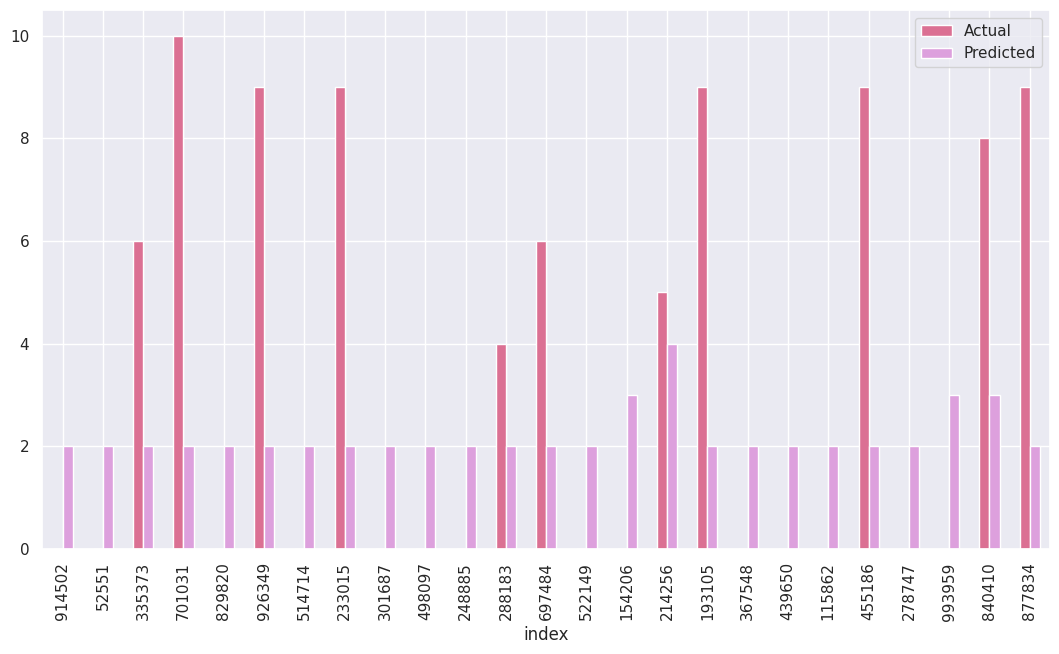

In [ ]:
pred.plot(kind='bar', figsize=(13, 7), color=['palevioletred', 'plum'])

–≤—ã–≥–ª—è–¥–∏—Ç –≥—Ä—É—Å—Ç–Ω–æ... üòû

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.54941233231352
MSE: 14.784617504811342
RMSE: 3.845077047968134


<Axes: >

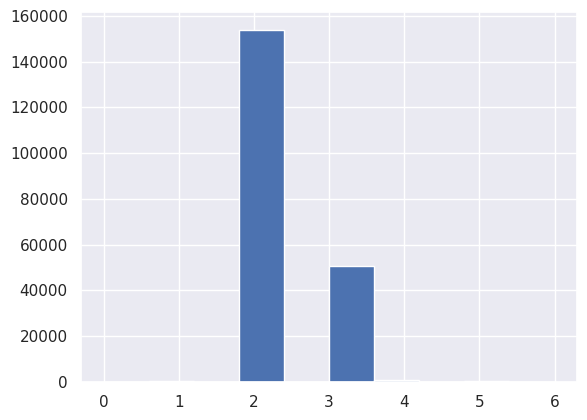

In [ ]:
#pd.Series(predictions[:, 0]).astype(int).hist()

# Linear Regression, –Ω–æ –±–µ–∑ –Ω—É–ª–µ–≤—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

–ê –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞....

array([[<Axes: title={'center': 'Book-Rating'}>]], dtype=object)

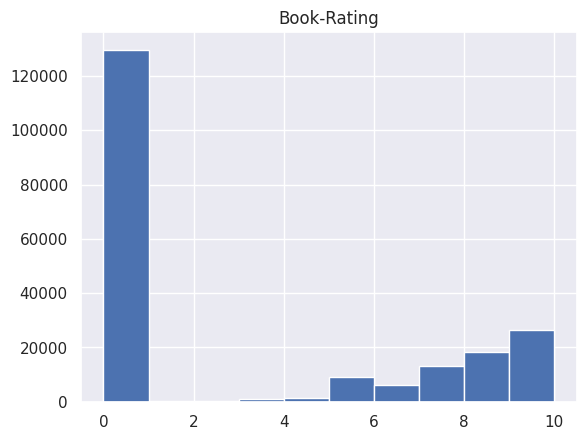

In [ ]:
y_test.hist()

–û–Ω–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —Å–∫–æ—à–µ–Ω–Ω—ã–º –≤ –º–µ–Ω—å—à—É—é —Å—Ç–æ—Ä–æ–Ω—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –º–æ–¥–µ–ª–∏ :( –û—Å–æ–±–µ–Ω–Ω–æ —É—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ —ç—Ç–æ –Ω–µ –≤–∞–ª–∏–¥–Ω–∞—è –æ—Ü–µ–Ω–∫–∞

In [ ]:
X_train_nozero, X_test_nozero, y_train_nozero, y_test_nozero = get_data(no_zero=True)

array([[<Axes: title={'center': 'Book-Rating'}>]], dtype=object)

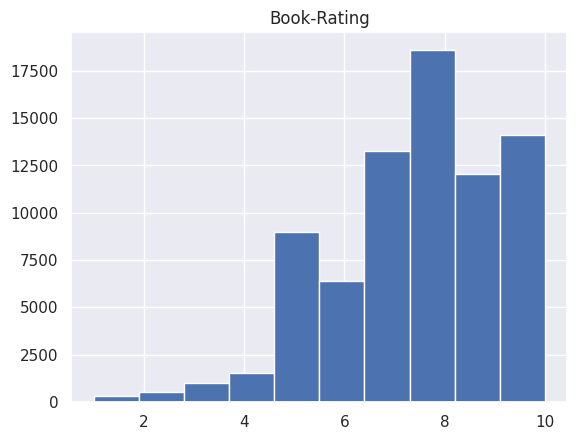

In [ ]:
y_test_nozero.hist()
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–¥–æ—Ä–æ–≤–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞. Kind of...

In [ ]:
t = time()

lr_nozero = LinearRegression()
lr_nozero.fit(X_train_nozero, y_train_nozero)

print('Time to fit the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to fit the model: 0.02 mins


<Axes: xlabel='index'>

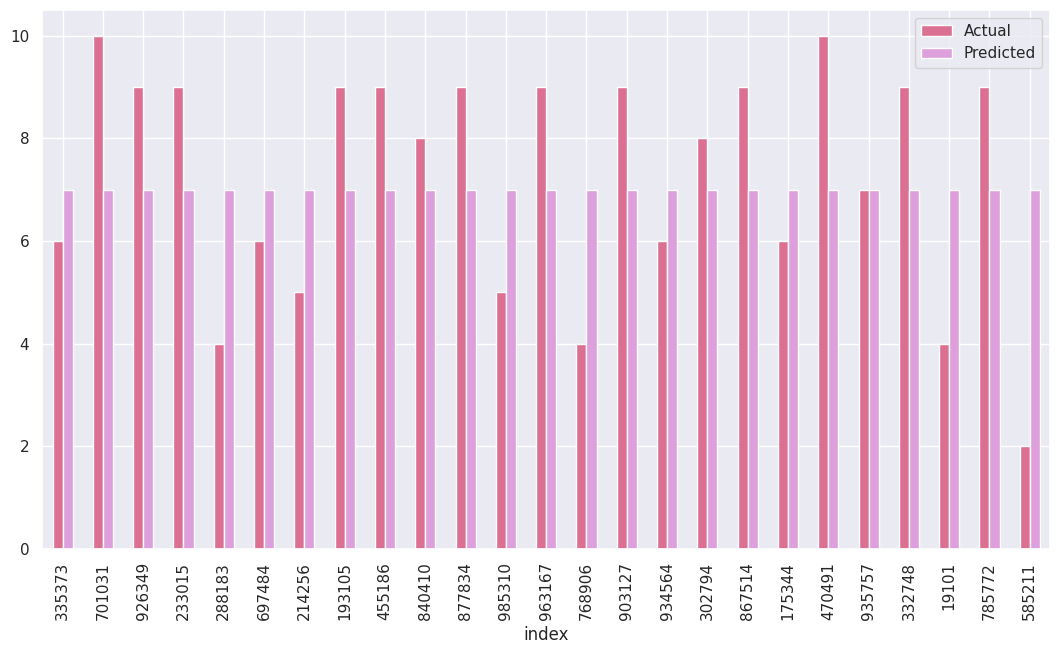

In [ ]:
predictions = lr_nozero.predict(X_test_nozero)
pred = pd.DataFrame({'Actual': y_test_nozero['Book-Rating'], 'Predicted': [int(a[0]) for a in predictions.tolist()]}).head(25)
pred.plot(kind='bar', figsize=(13, 7), color=['palevioletred', 'plum'])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_nozero, predictions))
print('MSE:', metrics.mean_squared_error(y_test_nozero, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_nozero, predictions)))

MAE: 1.493556685000281
MSE: 3.3985124026142532
RMSE: 1.84350546584876


# Random forest, with zeros

–í –∫–æ–ª–ª–∞–±–µ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ, –¥–µ–ª–∞—é –ª–æ–∫–∞–ª—å–Ω–æ

In [ ]:
X_train_transformed, X_test_transformed, y_train, y_test = get_data()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

t = time()

rfc = RandomForestClassifier(verbose=2, n_estimators=4, n_jobs=-1)
rfc.fit(X_train_transformed, y_train)

display(rfc.score(X_train_transformed, y_train))

print('Time to fit the model: {} mins'.format(round((time() - t) / 60, 2)))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 4
building tree 2 of 4
building tree 3 of 4
building tree 4 of 4


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 10.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    8.4s finished


0.7187011305585391

Time to fit the model: 10.8 mins


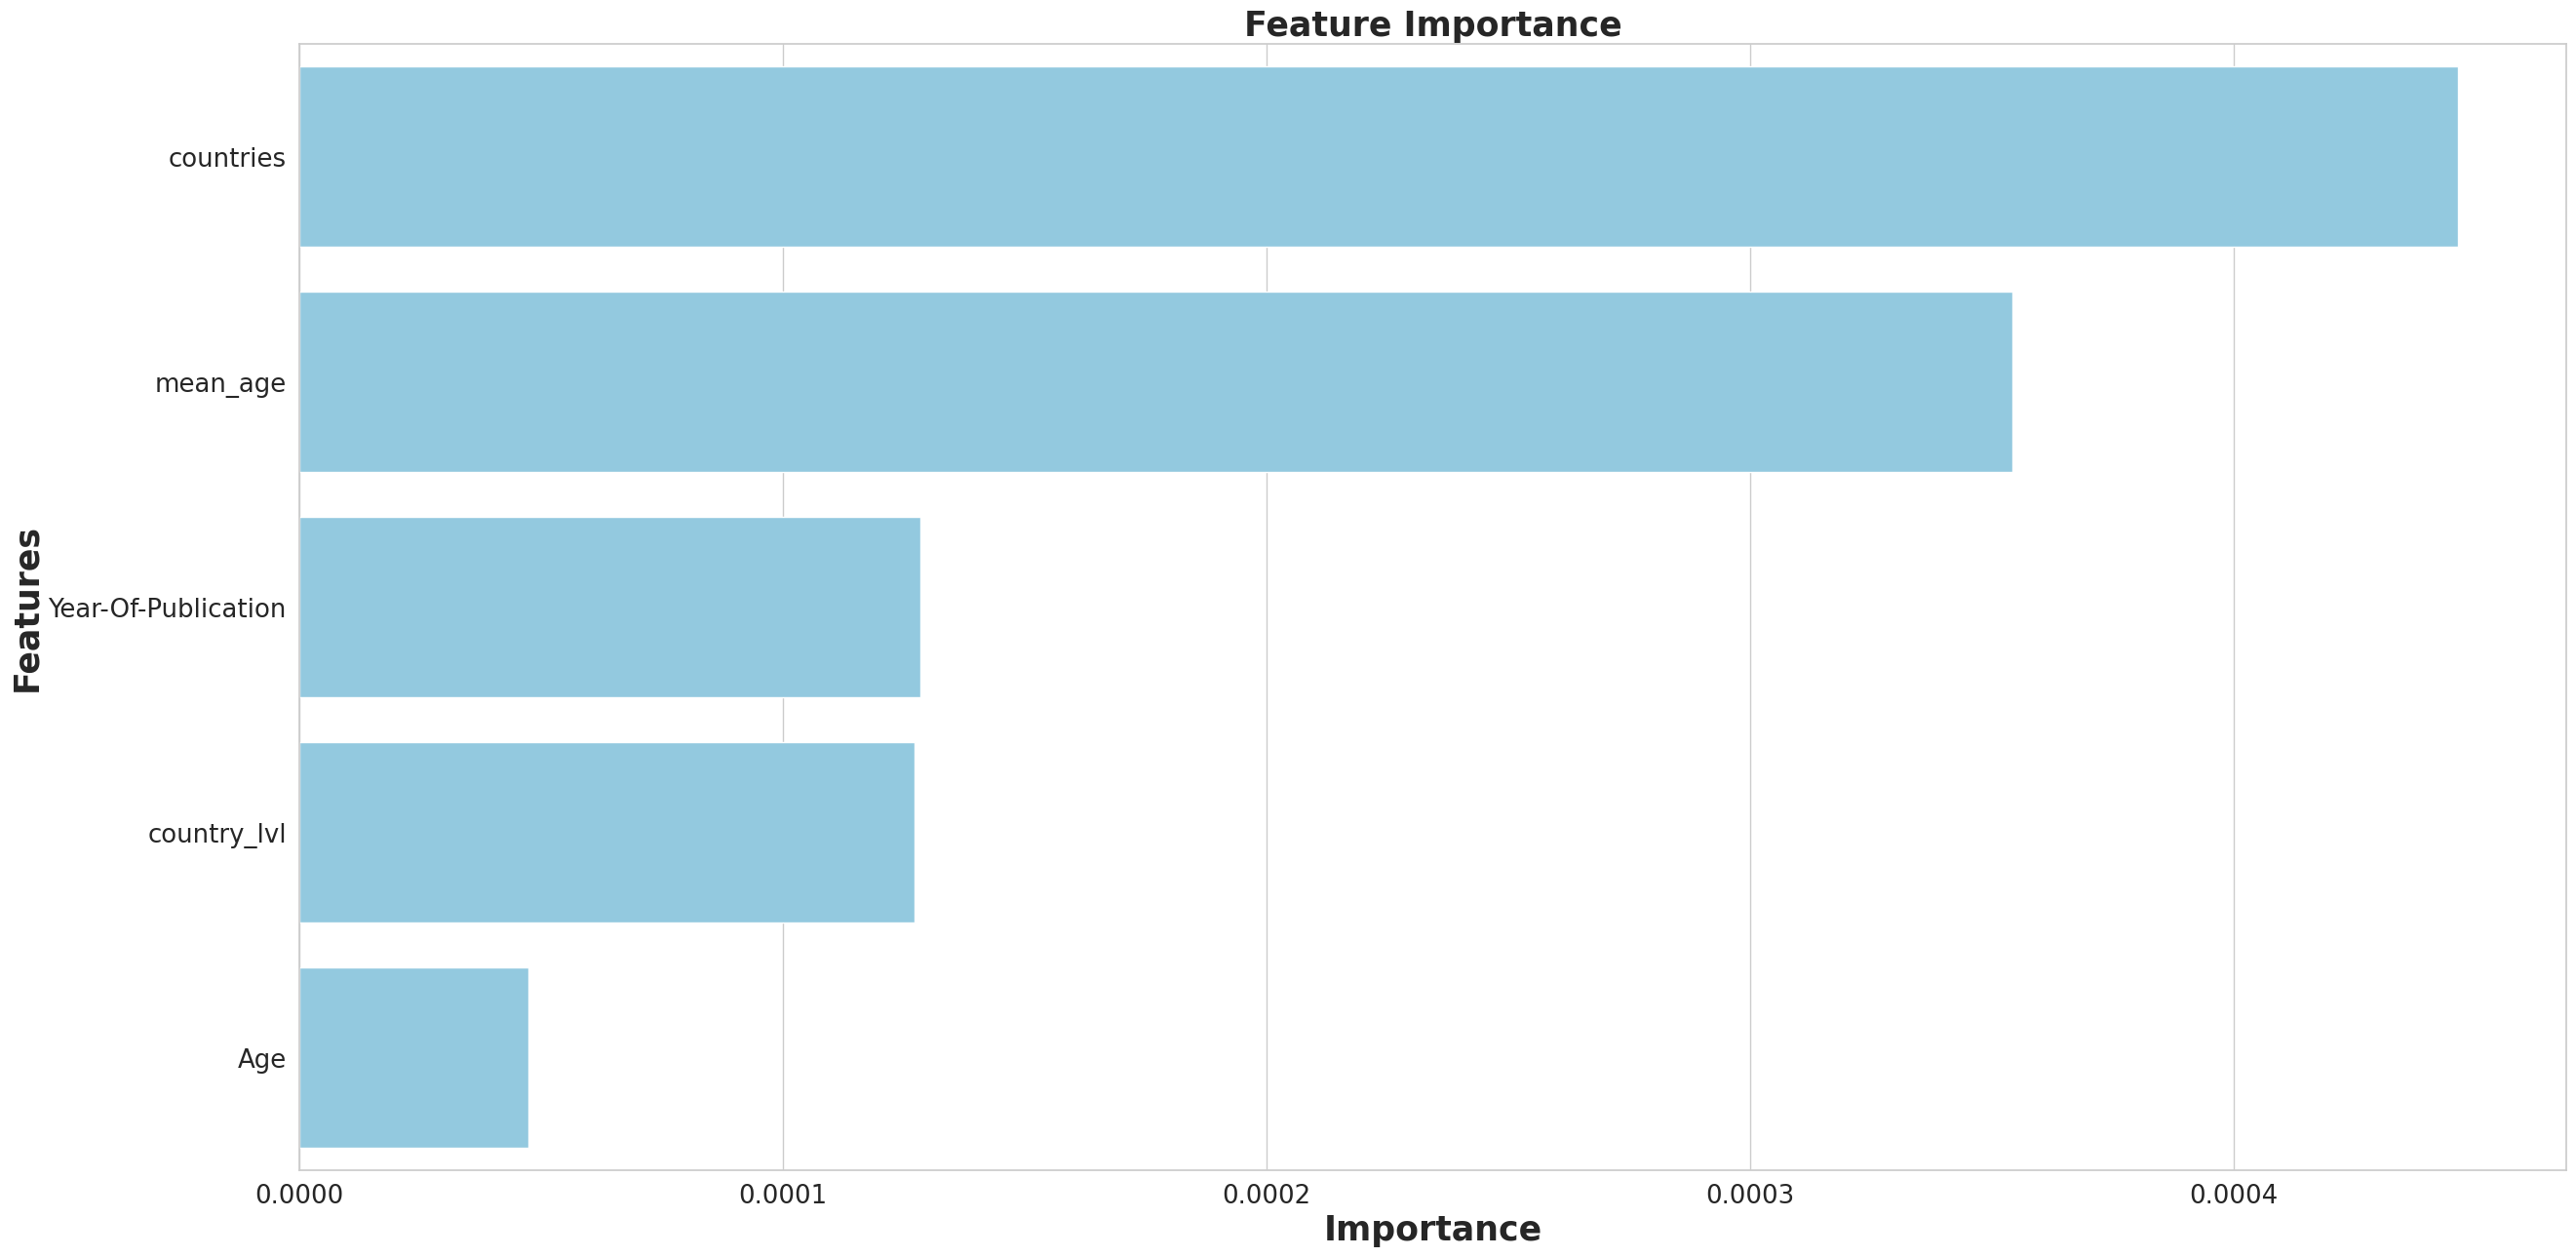

None

Features  Gini-Importance
0            countries         0.000447
1             mean_age         0.000354
2  Year-Of-Publication         0.000128
3          country_lvl         0.000127
4                  Age         0.000047

In [ ]:
feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    1.6s finished


<Axes: xlabel='index'>

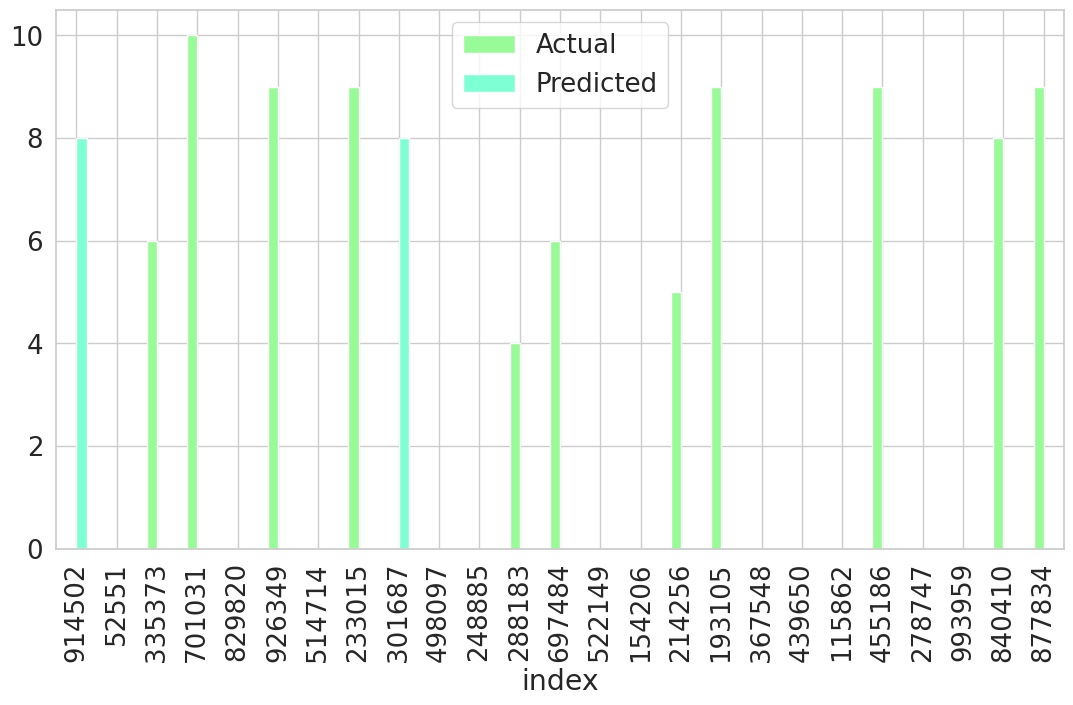

In [ ]:
predictions = rfc.predict(X_test_transformed)
pred = pd.DataFrame({'Actual': y_test['Book-Rating'], 'Predicted': [int(a) for a in predictions.tolist()]}).head(25)
pred.plot(kind='bar', figsize=(13, 7), color=['palegreen', 'aquamarine'])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.209229590550265
MSE: 25.17042787594313
RMSE: 5.017013840517397


# Random Forest, no zeros

In [ ]:
X_train_nozero, X_test_nozero, y_train_nozero, y_test_nozero = get_data(no_zero=True)

In [ ]:
t = time()

rfc_nozero = RandomForestClassifier(verbose=2, n_estimators=4, n_jobs=2)
rfc_nozero.fit(X_train_nozero, y_train_nozero)

display(rfc_nozero.score(X_train_nozero, y_train_nozero))

print('Time to fit the model: {} mins'.format(round((time() - t) / 60, 2)))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 4
building tree 2 of 4
building tree 3 of 4
building tree 4 of 4


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    1.0s finished


0.5841743769112776

Time to fit the model: 2.95 mins


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –≤–∞–∂–Ω—ã–º–∏ –º–æ–¥–µ–ª—å –ø–æ—Å—á–∏—Ç–∞–ª–∞ –Ω–∞—à–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏:

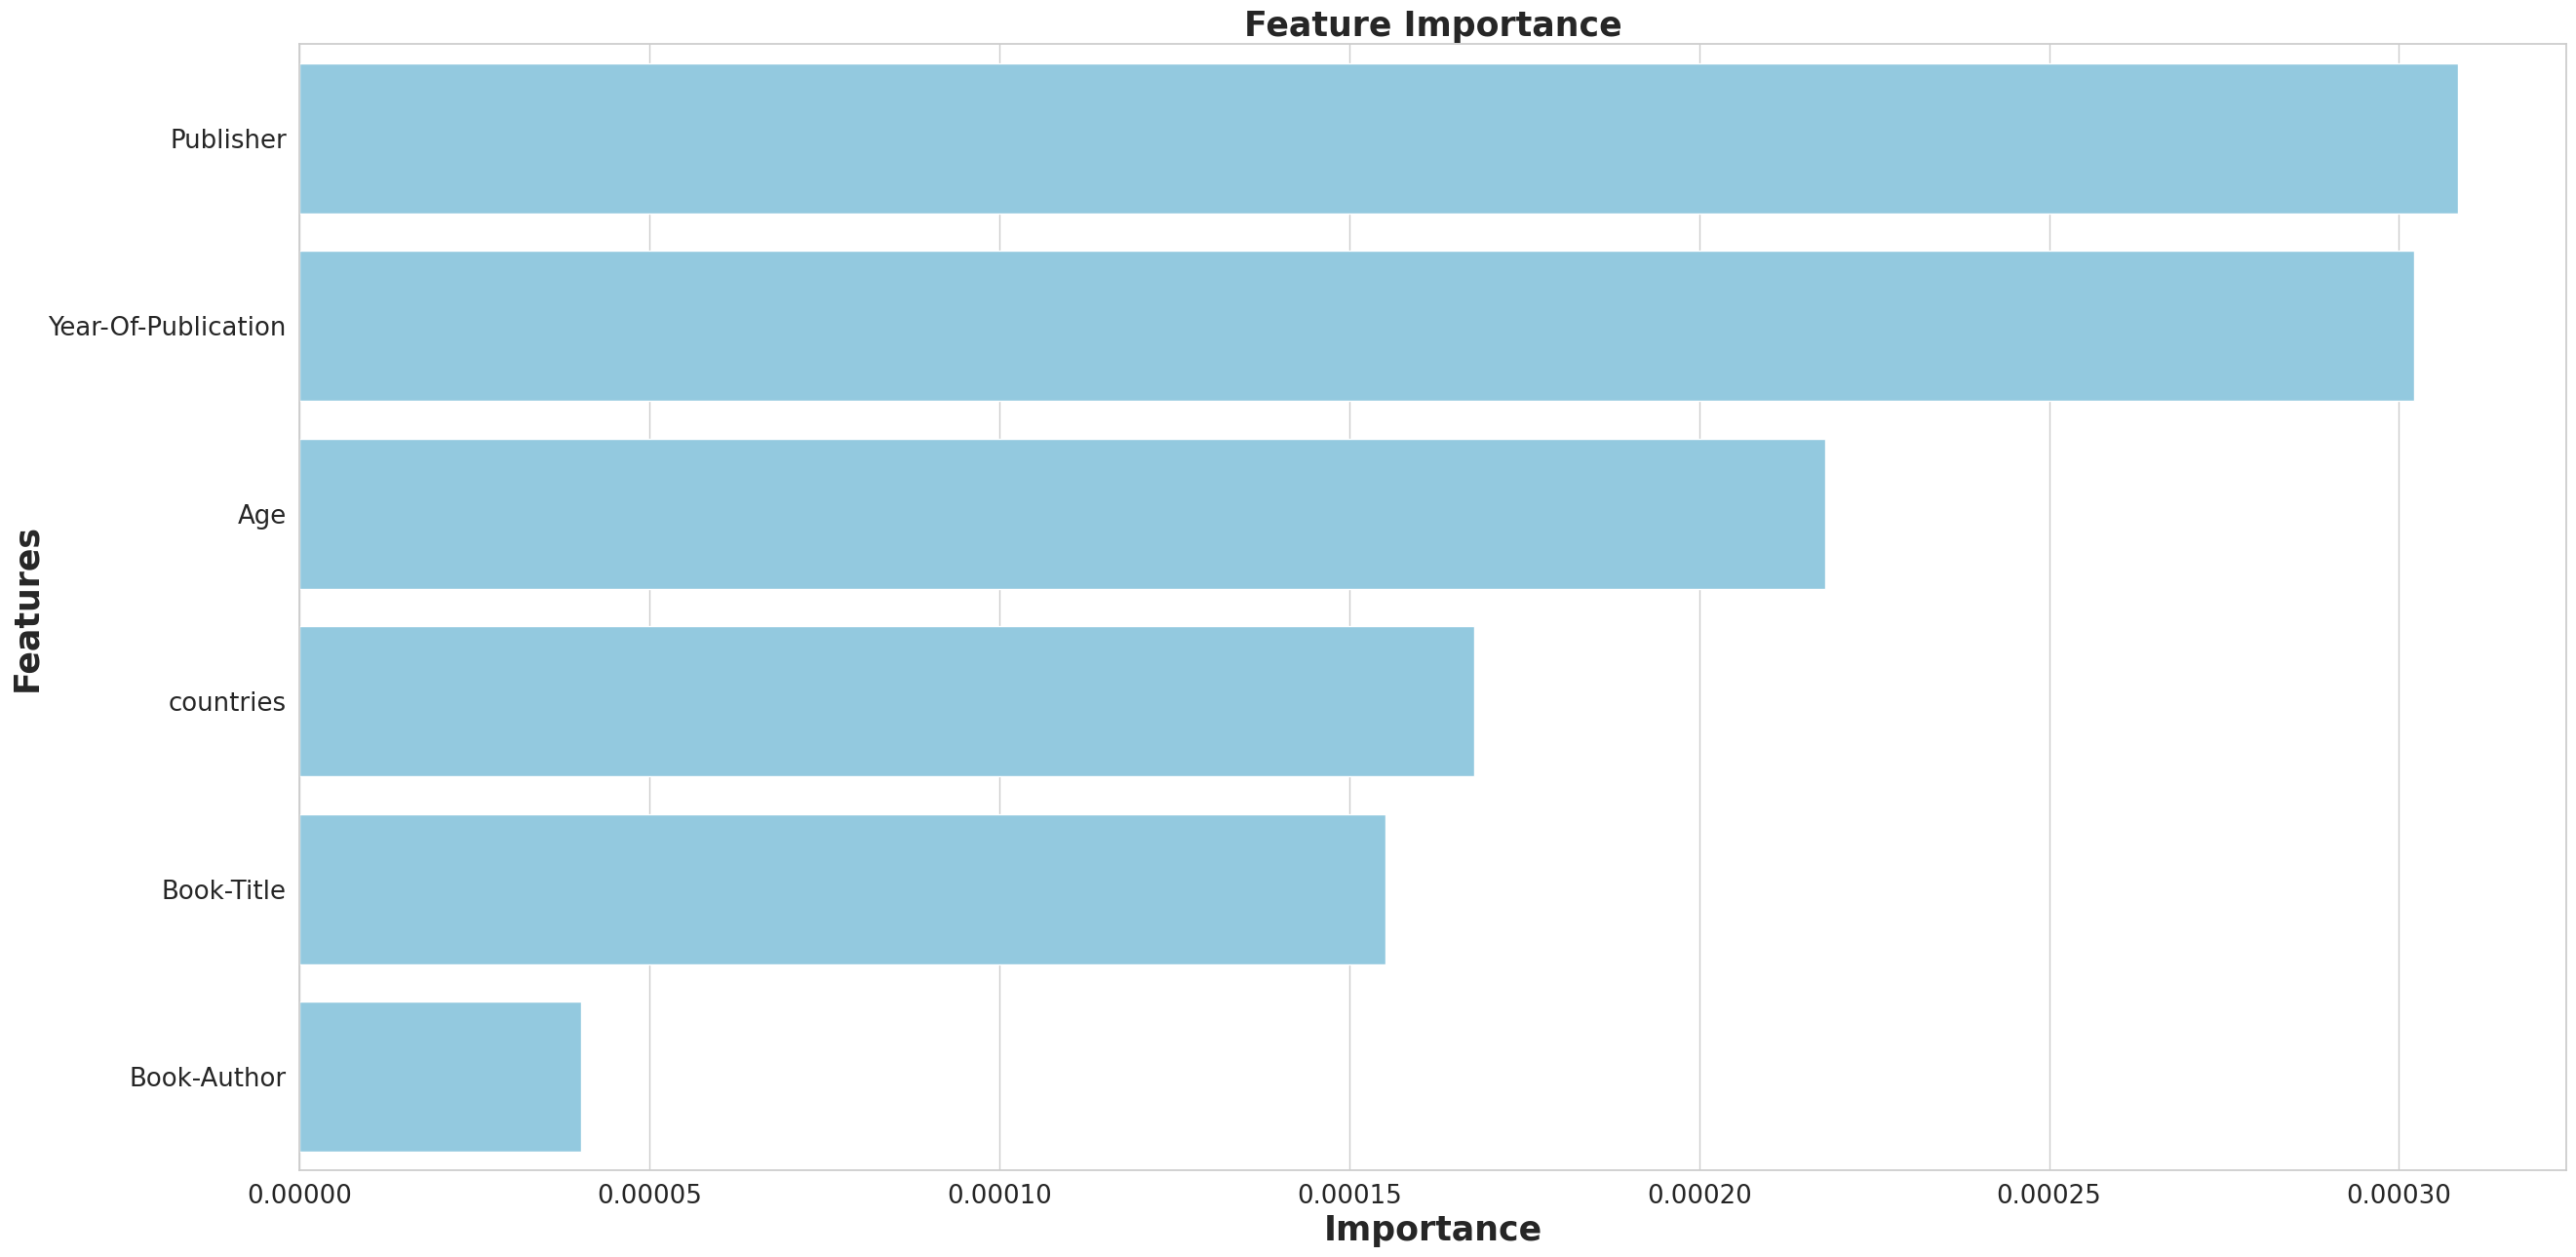

None

Features  Gini-Importance
0            Publisher         0.000308
1  Year-Of-Publication         0.000302
2                  Age         0.000218
3            countries         0.000168
4           Book-Title         0.000155
5          Book-Author         0.000040

In [ ]:
feats = {}
for feature, importance in zip(['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Age',
       'countries'], rfc_nozero.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.3s finished


<Axes: xlabel='index'>

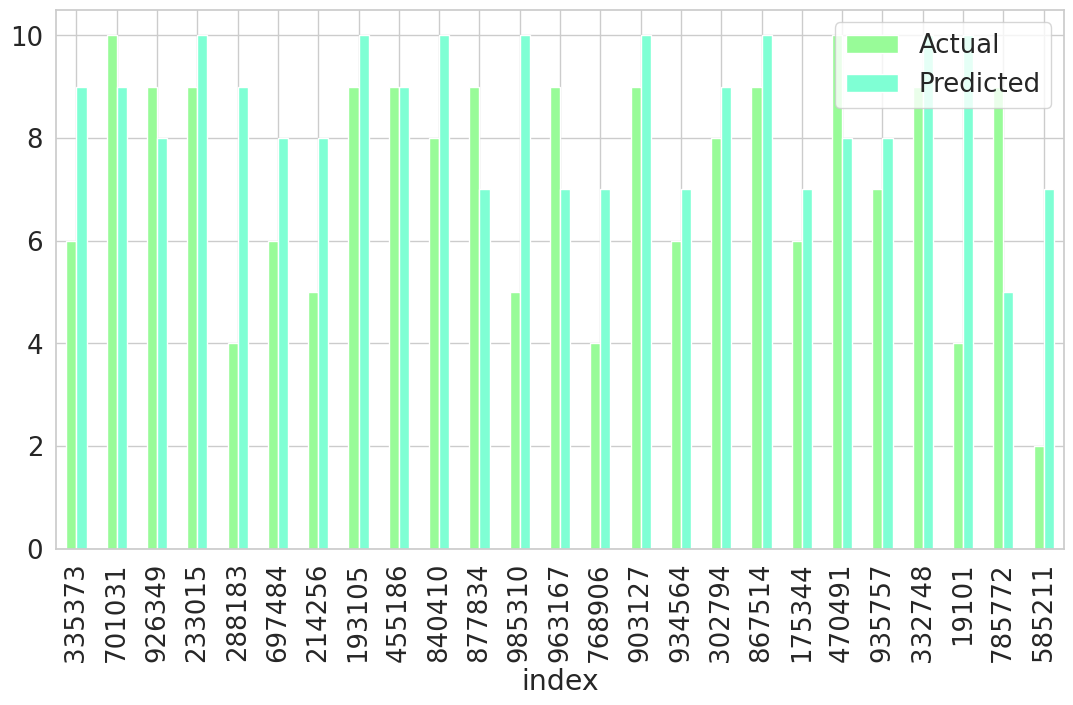

In [ ]:
predictions = rfc_nozero.predict(X_test_nozero)

pred = pd.DataFrame({'Actual': y_test_nozero['Book-Rating'], 'Predicted': [int(a) for a in predictions.tolist()]}).head(25)
pred.plot(kind='bar', figsize=(13, 7), color=['palegreen', 'aquamarine'])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_nozero, predictions))
print('MSE:', metrics.mean_squared_error(y_test_nozero, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_nozero, predictions)))

MAE: 1.8838890336025007
MSE: 6.12387340453243
RMSE: 2.4746461170301566


–ø–æ—Å—á–∏—Ç–∞—é –ª–æ–∫–∞–ª—å–Ω–æ)

# XGBOOST, with zeros

In [ ]:
import xgboost as xgb

X_train_transformed, X_test_transformed, y_train, y_test = get_data()

dtrain_reg = xgb.DMatrix(X_train_transformed, y_train)
dtest_reg = xgb.DMatrix(X_test_transformed, y_test)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é:

In [ ]:
params = {"objective": "reg:linear", "tree_method": "auto"}

n = 100
xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

<Axes: xlabel='index'>

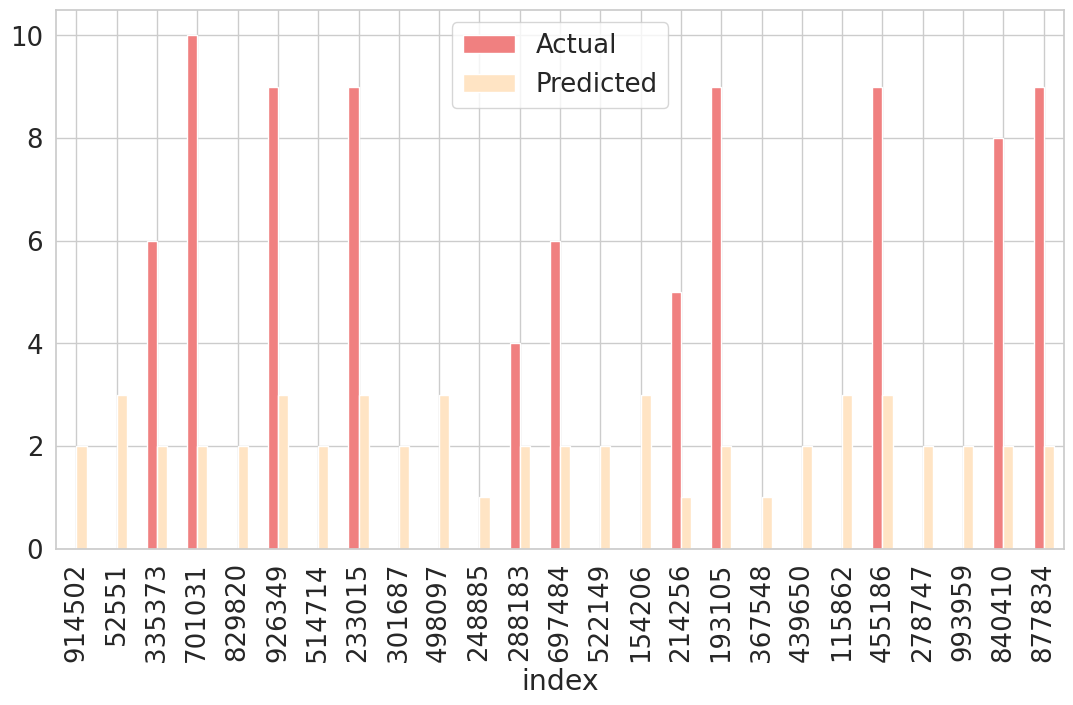

In [ ]:
predictions = xgb_model.predict(dtest_reg)
pred = pd.DataFrame({'Actual': y_test['Book-Rating'], 'Predicted': [int(a) for a in predictions.tolist()]}).head(25)
pred.plot(kind='bar', figsize=(13, 7), color=['lightcoral', 'bisque'])


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.422066204365098
MSE: 14.25706513906168
RMSE: 3.7758529022012604


–ü–æ–ª—É—á–∏–ª–∏ —á—Ç–æ-—Ç–æ –ø–æ—Ö–æ–∂–µ–µ –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤—ã—à–µ. –ü—Ä–æ–≤–µ—Ä–∏–º –≤—Å–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤ XGBOOST: (todo: –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é —Ç–æ–∂–µ)

In [ ]:
methods = {
 'reg:linear': {"objective": 'reg:linear', "tree_method": "auto"},
 'reg:pseudohubererror': {"objective": 'reg:pseudohubererror', "tree_method": "auto"},
 'reg:absoluteerror':  {"objective": 'reg:absoluteerror', "tree_method": "auto"},
 'reg:quantileerror':  {"objective": 'reg:quantileerror', "tree_method": "auto", 'quantile_alpha': 0.05},
 'reg:tweedie': {"objective": 'reg:tweedie', "tree_method": "auto"}}

best_xgb_model = None
best_xgb_model_mae = np.inf

for method in methods.keys():
    params = methods[method]
    n = 100

    t = time()

    xgb_model = xgb.train(
        params=params,
        dtrain=dtrain_reg,
        num_boost_round=n,
    )

    print('Time to fit the model: {} mins'.format(round((time() - t) / 60, 2)))

    predictions = xgb_model.predict(dtest_reg)
    mae = metrics.mean_absolute_error(y_test, predictions)

    print(f'method: {method}, scores:')
    print('MAE:', mae)
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('\n')

    if mae < best_xgb_model_mae:
        best_xgb_model = xgb_model


Time to fit the model: 0.2 mins
method: reg:linear, scores:
MAE: 3.422066204365098
MSE: 14.25706513906168
RMSE: 3.7758529022012604


Time to fit the model: 0.39 mins
method: reg:pseudohubererror, scores:
MAE: 4.137927698309503
MSE: 532.4159453735366
RMSE: 23.07414018709119


Time to fit the model: 1.3 mins
method: reg:absoluteerror, scores:
MAE: 2.8023349000559206
MSE: 22.026618648583284
RMSE: 4.693252459497921


Time to fit the model: 0.74 mins
method: reg:quantileerror, scores:
MAE: 2.8408906647002796
MSE: 22.948247788839787
RMSE: 4.790432943778651


Time to fit the model: 0.57 mins
method: reg:tweedie, scores:
MAE: 3.4168490607673596
MSE: 14.281960193776943
RMSE: 3.7791480777785016




–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫–∏–µ –∂–µ :(

# XGB no zero

In [ ]:
X_train_nozero, X_test_nozero, y_train_nozero, y_test_nozero = get_data(no_zero=True)
dtrain_reg_nozero = xgb.DMatrix(X_train_nozero, y_train_nozero)
dtest_reg_nozero = xgb.DMatrix(X_test_nozero, y_test_nozero)

In [ ]:
params = {"objective": "reg:linear", "tree_method": "auto"}

n = 100
xgb_model_nozero = xgb.train(
   params=params,
   dtrain=dtrain_reg_nozero,
   num_boost_round=n,
)

<Axes: xlabel='index'>

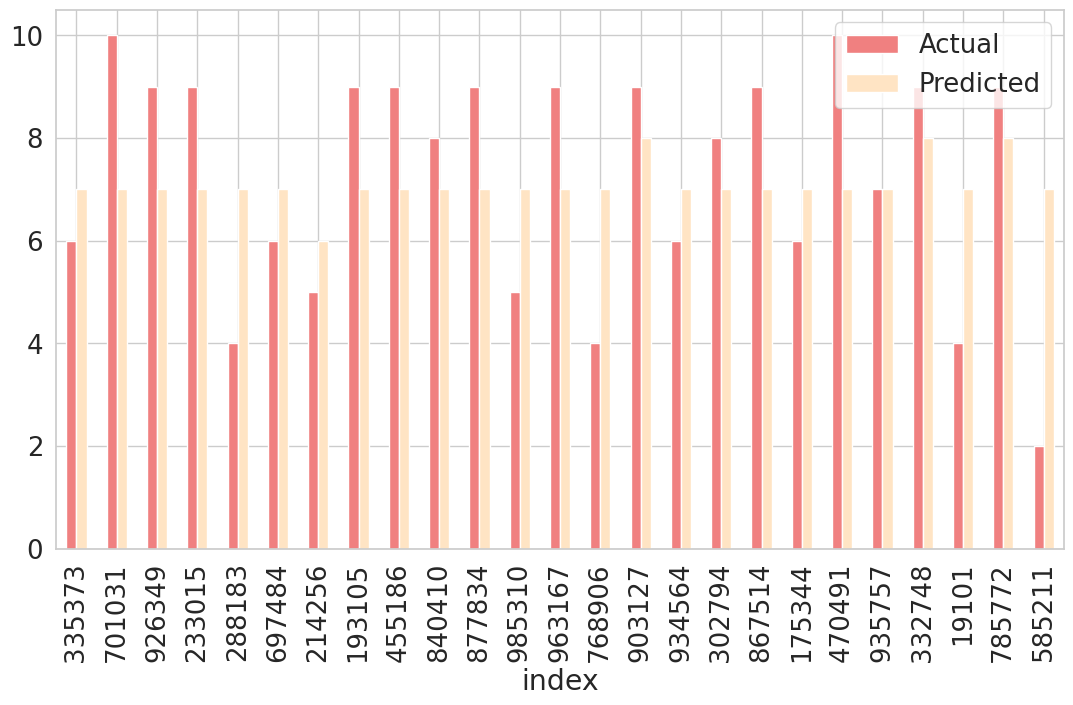

In [ ]:
predictions = xgb_model_nozero.predict(dtest_reg_nozero)
pred = pd.DataFrame({'Actual': y_test_nozero['Book-Rating'], 'Predicted': [int(a) for a in predictions.tolist()]}).head(25)
pred.plot(kind='bar', figsize=(13, 7), color=['lightcoral', 'bisque'])


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_nozero, predictions))
print('MSE:', metrics.mean_squared_error(y_test_nozero, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_nozero, predictions)))

MAE: 1.4557068405377427
MSE: 3.288501700011764
RMSE: 1.8134226479262257


–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ:

In [ ]:
methods = {
 'reg:linear': {"objective": 'reg:linear', "tree_method": "auto"},
 'reg:pseudohubererror': {"objective": 'reg:pseudohubererror', "tree_method": "auto"},
 'reg:absoluteerror':  {"objective": 'reg:absoluteerror', "tree_method": "auto"},
 'reg:quantileerror':  {"objective": 'reg:quantileerror', "tree_method": "auto", 'quantile_alpha': 0.95},
 'reg:gamma': {"objective": 'reg:gamma'},
 'reg:tweedie': {"objective": 'reg:tweedie'}}

best_xgb_model_nozero = None
best_xgb_model_nozero_mae = np.inf

for method in methods.keys():
    params = methods[method]
    n = 150

    t = time()

    xgb_model_nozero = xgb.train(
        params=params,
        dtrain=dtrain_reg_nozero,
        num_boost_round=n,
    )


    print('Time to fit the model: {} mins'.format(round((time() - t) / 60, 2)))

    predictions = xgb_model_nozero.predict(dtest_reg_nozero)
    mae = metrics.mean_absolute_error(y_test_nozero, predictions)

    print(f'method: {method}, scores:')
    print('MAE:', mae)
    print('MSE:', metrics.mean_squared_error(y_test_nozero, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_nozero, predictions)))
    print('\n')

    if mae < best_xgb_model_nozero_mae:
        best_xgb_model_nozero = xgb_model_nozero

Time to fit the model: 0.19 mins
method: reg:linear, scores:
MAE: 1.455011718016672
MSE: 3.2905270301764755
RMSE: 1.8139809894749381


Time to fit the model: 0.12 mins
method: reg:pseudohubererror, scores:
MAE: 181.62838496699808
MSE: 32992.28370255305
RMSE: 181.63778159444982


Time to fit the model: 0.41 mins
method: reg:absoluteerror, scores:
MAE: 1.4283139071106818
MSE: 3.4773293350677257
RMSE: 1.8647598598928832


Time to fit the model: 0.3 mins
method: reg:quantileerror, scores:
MAE: 2.3693670226621517
MSE: 9.027376921073197
RMSE: 3.004559355558348


Time to fit the model: 0.27 mins
method: reg:gamma, scores:
MAE: 1.4562108013849762
MSE: 3.294347840587409
RMSE: 1.815033840066738


Time to fit the model: 0.1 mins
method: reg:tweedie, scores:
MAE: 1.4574811717624867
MSE: 3.301840310328778
RMSE: 1.8170966706063765




# –ù–µ–π—Ä–æ–Ω–∫–∞

## Torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.utils.data as data_utils
import torchvision

from typing import List, Callable
import itertools

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, leaky_coef=0.1):
        super(SimpleNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [ ]:
X_train

Year-Of-Publication        Age  countries   mean_age  country_lvl
index                                                                   
676671                2000  36.558352        usa  36.917013            5
819812                1980  34.000000        usa  37.373536            5
365902                2000  32.000000     canada  37.624078            4
1899                  2000  36.558352        usa  39.992959            5
604420                1980  27.000000        usa  27.000000            5
...                    ...        ...        ...        ...          ...
298531                2000  37.000000  argentina  37.000000            2
587562                1980  26.000000        usa  26.000000            5
954892                1980  30.000000        usa  34.205835            5
593778                2000  36.558352        usa  36.558352            5
959128                2000  36.558352        usa  35.372235            5

[307069 rows x 5 columns]

In [ ]:
num_classes = 10
model = SimpleNN(4, num_classes, 128)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 1e-4)

In [ ]:
batch_size = 16

y_tr = torch.tensor(y_train.values.astype(np.float32))
x_tr = torch.tensor(X_train.drop(['countries'], axis=1).values.astype(np.float32))
print(y_tr.shape, x_tr.shape)
train_ds = data_utils.TensorDataset(x_tr, y_tr)
train_dl = data_utils.DataLoader(dataset = train_ds, batch_size = batch_size, shuffle = True)

torch.Size([307069, 1]) torch.Size([307069, 4])


In [ ]:
y_ts = torch.tensor(y_test.values.astype(np.float32))
x_ts = torch.tensor(X_test.drop(['countries'], axis=1).values.astype(np.float32))
test_ds = data_utils.TensorDataset(x_tr, y_tr)
test_dl = data_utils.DataLoader(dataset = test_ds, batch_size = batch_size, shuffle = True)

In [ ]:
data = torch.stack([test_ds[i][0] for i in range(400)])
data_cls = np.array([test_ds[i][1] for i in range(400)])


n_epochs = 15
loss_fn = nn.MSELoss()
for epoch in list(range(n_epochs)):
    for imgs, lbls in train_dl:
        optimizer.zero_grad()
        out = model(imgs)
        loss = loss_fn(out, lbls)
        loss.backward()
        optimizer.step()
    test_acc = np.mean([int((i==j)*1) for i,j in zip(model(x_ts).argmax(dim=1), y_ts)])
    print("Epoch {} | loss: {} | acc: {}".format(epoch, loss.item(), test_acc))

Epoch 0 | loss: 4.579689979553223 | acc: 0.12029595279344527
Epoch 1 | loss: 1.8361799716949463 | acc: 0.12060857898370436
Epoch 2 | loss: 1.6907700300216675 | acc: 0.23743959150177807
Epoch 3 | loss: 2.1930930614471436 | acc: 0.13263166121741848
Epoch 4 | loss: 5.3001909255981445 | acc: 0.12792924227227137
Epoch 5 | loss: 1.7230143547058105 | acc: 0.12795529445479295
Epoch 6 | loss: 2.684447765350342 | acc: 0.2381560265211218
Epoch 7 | loss: 3.4548118114471436 | acc: 0.23224218108872072
Epoch 8 | loss: 2.3279385566711426 | acc: 0.19709778686709478
Epoch 9 | loss: 2.928698778152466 | acc: 0.19115788925217211
Epoch 10 | loss: 0.5211179852485657 | acc: 0.22051869895400486
Epoch 11 | loss: 3.5249392986297607 | acc: 0.1782490328127239
Epoch 12 | loss: 2.9016854763031006 | acc: 0.20394951087027316
Epoch 13 | loss: 2.7642290592193604 | acc: 0.12094725735648504
Epoch 14 | loss: 4.070569038391113 | acc: 0.2378434003308627
Epoch 15 | loss: 3.2070343494415283 | acc: 0.17525303182274096
Epoch 16 

In [209]:
p = model(x_ts)

<function Tensor.values>

<Axes: >

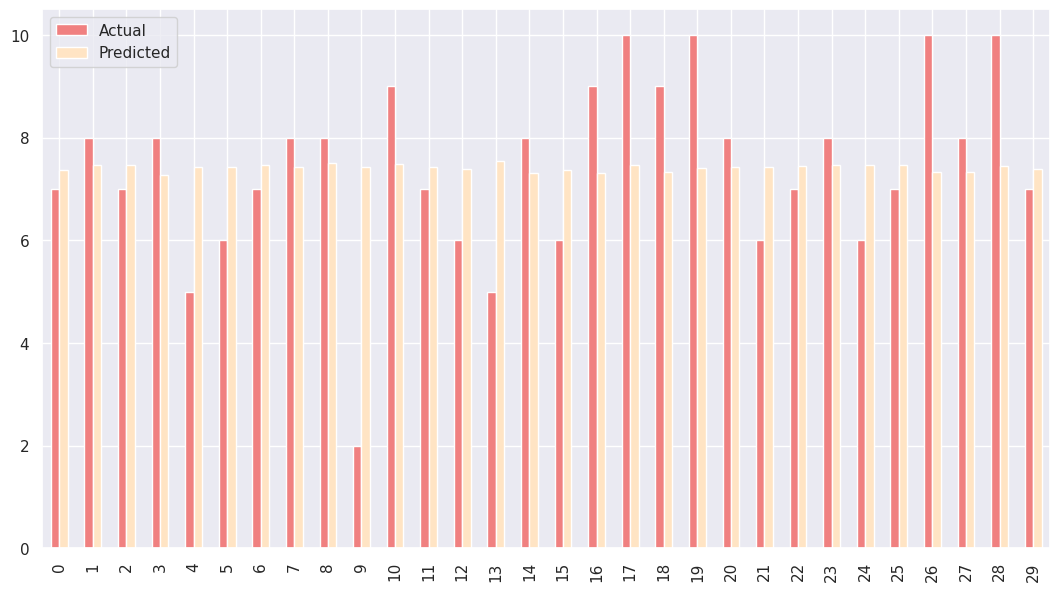

In [231]:
predictions = model(x_ts)
pred = pd.DataFrame({'Actual': [int(b) for b in y_ts], 'Predicted': [float(a.mean()) for a in predictions]}).head(30)
pred.plot(kind='bar', figsize=(13, 7), color=['lightcoral', 'bisque'])

## Tensorflow Keras

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def train_nn(X_train, y_train, X_test, y_test):
    nn_model = Sequential(
        [
            InputLayer(input_shape=X_train.shape[1:]),
            Dense(128, activation='relu', kernel_regularizer='l1'),
            Dense(512, activation='relu', kernel_regularizer='l1'),
            Dense(128, activation='relu', kernel_regularizer='l1'),
            Dropout(0.5),
            Dense(32, activation='relu', kernel_regularizer='l1'),
            Dense(1, activation='sigmoid')
        ]
    )
    nn_model.compile(
        optimizer=Adam(0.01),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    nn_model.build()
    print(nn_model.summary())

    nn_model.fit(X_train, y_train / 10, epochs=2, batch_size=1024)

    predictions = nn_model.predict(X_test, batch_size=1024) * 10
    pred = pd.DataFrame({'Actual': y_test['Book-Rating'], 'Predicted': [round(a[0]) for a in predictions.tolist()]}).head(25)
    pred.plot(kind='bar', figsize=(13, 7), color=['lightcoral', 'bisque'])

    print('Test MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('Test MSE:', metrics.mean_squared_error(y_test, predictions))
    print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

    return nn_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6912      
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 142,785
Trainable params: 142,785
Non-trai

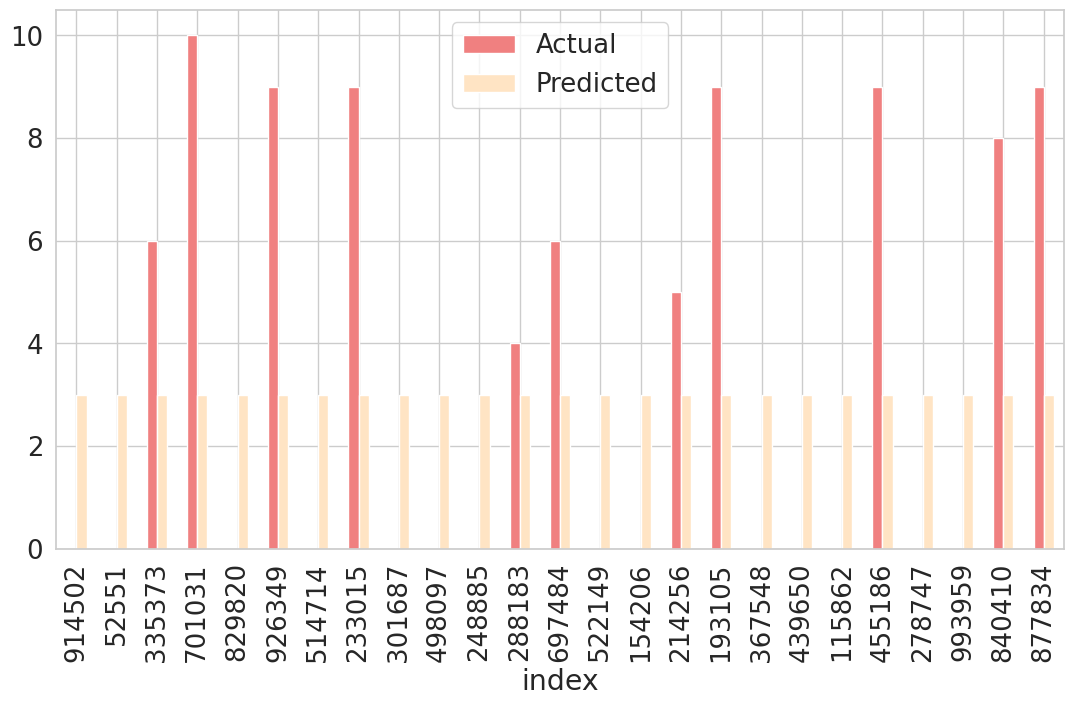

In [ ]:
nn_model = train_nn(X_train_transformed.toarray(), y_train, X_test_transformed.toarray(), y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               6912      
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 142,785
Trainable params: 142,785
Non-tr

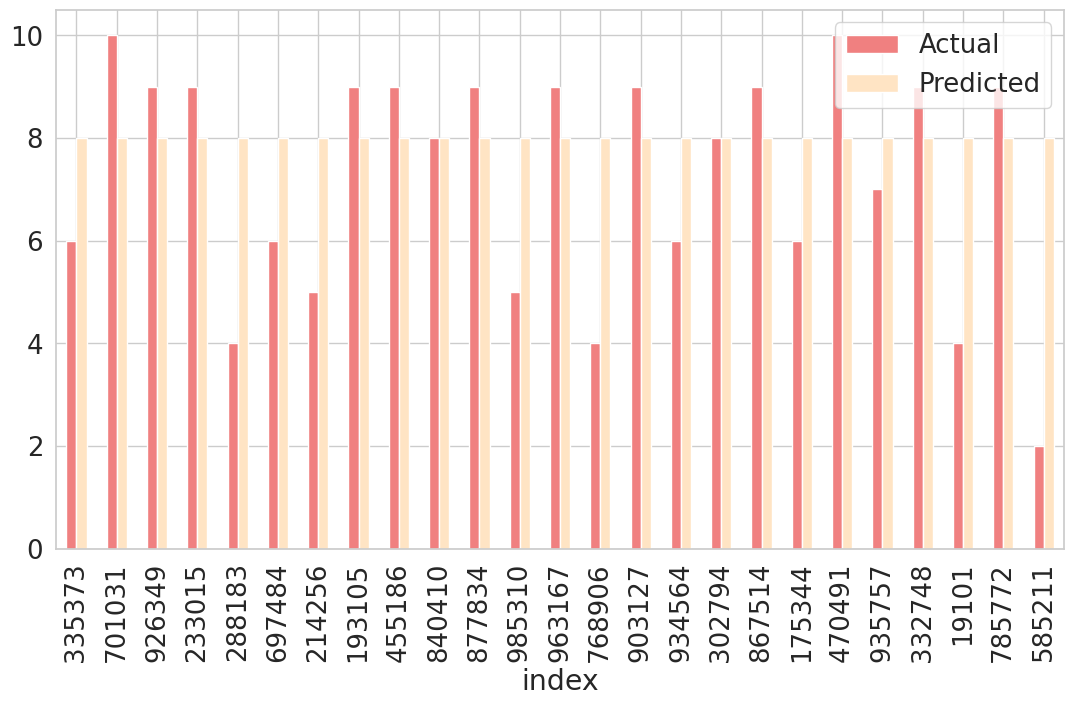

In [ ]:
nn_model_nozero = train_nn(X_train_nozero.toarray(), y_train_nozero, X_test_nozero.toarray(), y_test_nozero)

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

## –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ pyspark

In [ ]:
%%capture
!pip install pyspark

In [ ]:
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
from pyspark.ml.evaluation import RegressionEvaluator

sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
ratings = books[['User-ID', 'ISBN', 'Book-Rating']]

In [ ]:
rating_non_zero = ratings[ratings["Book-Rating"] > 0]
rating_non_zero.shape

(383842, 3)

In [ ]:
def train_als(data):
    ratings_spark = spark.createDataFrame(ratings)

    data_spark = (ratings_spark
        .select(
            'User-ID',
            'ISBN',
            'Book-Rating',
        )
    ).cache()
    (training, test) = data_spark.randomSplit([0.8, 0.2])
    als = ALS(maxIter=2, regParam=0.01,
          userCol="User-ID", itemCol="ISBN", ratingCol="Book-Rating",
          coldStartStrategy="drop",
          implicitPrefs=True)
    model = als.fit(training)

    predictions = model.transform(test)

    evaluator = RegressionEvaluator(metricName="rmse", labelCol="Book-Rating",
                                    predictionCol="prediction")

    rmse = evaluator.evaluate(predictions)

    print("Root-mean-square error = " + str(rmse))

    evaluator = RegressionEvaluator(metricName="mae", labelCol="Book-Rating",
                                    predictionCol="prediction")

    mae = evaluator.evaluate(predictions)

    print("MAE = " + str(mae))

    return model

In [ ]:
%%time
als_model = train_als(ratings)

Root-mean-square error = 4.6483978961043
MAE = 2.685297748678936
CPU times: user 35.4 s, sys: 274 ms, total: 35.7 s
Wall time: 1min 41s


In [ ]:
%%time
als_non_zero = train_als(rating_non_zero)

Root-mean-square error = 4.6571962985609465
MAE = 2.6946859806611876
CPU times: user 34.5 s, sys: 186 ms, total: 34.7 s
Wall time: 1min 16s


## –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ surprise


In [ ]:
%%capture
!pip install scikit-surprise

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

In [ ]:
svd = SVD()
reader = Reader(rating_scale=(0, 11))
data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.5036  3.5013  3.5141  3.5141  3.5050  3.5076  0.0054  
MAE (testset)     2.8072  2.8068  2.8159  2.8118  2.8053  2.8094  0.0039  
Fit time          32.43   30.48   31.23   32.20   33.09   31.88   0.92    
Test time         3.20    2.07    4.40    3.66    1.83    3.03    0.97    


{'test_rmse': array([3.50363598, 3.50133166, 3.51411493, 3.51408463, 3.50495252]),
 'test_mae': array([2.80715312, 2.80676858, 2.81594384, 2.81176546, 2.80527167]),
 'fit_time': (32.429020404815674,
  30.477115392684937,
  31.228304147720337,
  32.19815540313721,
  33.0890474319458),
 'test_time': (3.197108745574951,
  2.0695912837982178,
  4.395397424697876,
  3.662665843963623,
  1.8286662101745605)}

In [ ]:
svd_non_zero = SVD()
reader = Reader(rating_scale=(0, 11))
data = Dataset.load_from_df(rating_non_zero[["User-ID", "ISBN", "Book-Rating"]], reader)

cross_validate(svd_non_zero, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6434  1.6399  1.6377  1.6338  1.6309  1.6371  0.0044  
MAE (testset)     1.2694  1.2660  1.2655  1.2608  1.2579  1.2640  0.0041  
Fit time          12.90   19.29   18.52   20.91   15.78   17.48   2.83    
Test time         2.46    0.62    0.99    2.31    0.61    1.40    0.82    


{'test_rmse': array([1.6433662 , 1.63987731, 1.63768259, 1.63379251, 1.6308767 ]),
 'test_mae': array([1.2694252 , 1.26603853, 1.26553536, 1.26082078, 1.25793371]),
 'fit_time': (12.896913528442383,
  19.29203748703003,
  18.524791955947876,
  20.90720224380493,
  15.784388065338135),
 'test_time': (2.4642081260681152,
  0.6189706325531006,
  0.9928669929504395,
  2.3110008239746094,
  0.6061584949493408)}

## –í—ã–±–µ—Ä–µ–º —é–∑–µ—Ä–æ–≤ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ

–í—ã–±–µ—Ä–µ–º 5 —é–∑–µ—Ä–æ–≤ –∏ –≤—ã–¥–µ–ª–∏–º –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ —ç—Ç–∏–º —é–∑–µ—Ä–∞–º

In [ ]:
NUM_USERS = 5

rand_users = users.sample(NUM_USERS)

rand_users.head()

User-ID                     Location   Age
261684   261685      bethpage, new york, usa  43.0
116631   116632  london, n/a, united kingdom  29.0
232807   232808      mohon, bretagne, france  33.0
73322     73323      bismarck, illinois, usa  41.0
219006   219007      london, ontario, canada  36.0

In [ ]:
res_train = df_train[df_train['User-ID'].isin(rand_users['User-ID'])]
res_test = df_test[df_test['User-ID'].isin(rand_users['User-ID'])]

print(res_train['User-ID'].value_counts())
print(res_test['User-ID'].value_counts())

261685    34
Name: User-ID, dtype: int64
261685    16
Name: User-ID, dtype: int64


In [ ]:
train_inds = [df_train.index.get_loc(ind) for ind in res_train.index]
test_inds = [df_test.index.get_loc(ind) for ind in res_test.index]

In [ ]:
rand_users_x_train = X_train_transformed[train_inds].toarray()
rand_users_y_train = y_train.iloc[train_inds].to_numpy()
rand_users_x_test = X_test_transformed[test_inds].toarray()
rand_users_y_test = y_test.iloc[test_inds].to_numpy()

print("Train features shape:", rand_users_x_train.shape)
print("Test features shape:", rand_users_x_test.shape)

Train features shape: (34, 53)
Test features shape: (16, 53)


In [ ]:
# Join

rand_users_features = np.concatenate([rand_users_x_train, rand_users_x_test])
rand_users_labels = np.concatenate([rand_users_y_train, rand_users_y_test])

print("Features shape:", rand_users_features.shape)
print("Labels shape:", rand_users_labels.shape)

Features shape: (50, 53)
Labels shape: (50, 1)


–í—ã–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ —é–∑–µ—Ä–∞–º –¥–ª—è –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–∞–±–æ—Ä–∞—Ç–∏–≤–Ω–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏

In [ ]:
rand_users_ratings = ratings[ratings['User-ID'].isin(rand_users['User-ID'])]

print("Num users:", rand_users_ratings.shape)

rand_users_ratings.head()

Num users: (50, 3)


User-ID    ISBN  Book-Rating
606051   261685   99240            0
606052   261685  132855            0
606053   261685  186914            0
606054   261685  121902            9
606055   261685  185090            0

## C–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (—Å –Ω—É–ª—è–º–∏)

In [ ]:
# –º–æ–¥–µ–ª–∏ –∫–æ–ª–ª–∞–±–æ—Ä–∞—Ç–∏–≤–Ω–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏

rand_users_ratings_spark = (
    spark.createDataFrame(rand_users_ratings)
    .select(
        'User-ID',
        'ISBN'
    )
).cache()
als_predict = als_model.transform(rand_users_ratings_spark).toPandas()
als_predict = als_predict.rename(columns={"prediction": "ALS"})

In [ ]:
rand_users_ratings_testset = Dataset \
    .load_from_df(rand_users_ratings, reader) \
    .build_full_trainset().build_testset()

svd_predict = rand_users_ratings[['User-ID', 'ISBN']].copy()
svd_predict['SVD'] = [i.est for i in svd.test(rand_users_ratings_testset)]

In [ ]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π

lr_predict = lr.predict(rand_users_features)
rfc_predict = rfc.predict(rand_users_features)
xgb_predict = xgb_model.predict(xgb.DMatrix(rand_users_features, rand_users_labels))
nn_predict = nn_model.predict(rand_users_features)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.0s finished


2/2 [==============================] - 0s 11ms/step


In [ ]:
res_df = res_train[['User-ID', 'ISBN', 'Book-Rating']].append(res_test[['User-ID', 'ISBN', 'Book-Rating']])
res_df['Linear'] = lr_predict
res_df['Random Forest'] = rfc_predict
res_df['XGBOOST'] = xgb_predict
res_df['Neural Network'] = nn_predict

In [ ]:
res_df = res_df.merge(als_predict, on=['User-ID', 'ISBN'])
res_df = res_df.merge(svd_predict, on=['User-ID', 'ISBN'])

In [ ]:
res_df['Mean'] = (res_df['Linear'] + res_df['Random Forest'] + \
                 res_df['XGBOOST'] + res_df['Neural Network'] + \
                 res_df['ALS'] + res_df['SVD']) / 6

In [ ]:
res_df

User-ID    ISBN  Book-Rating    Linear  Random Forest   XGBOOST  \
0    261685  141494            0  2.579799              0  0.000244   
1    261685  231922           10  2.955745              0  0.000126   
2    261685  218116            0  2.631100              0  0.000504   
3    261685  132683            0  2.599537              0  0.000027   
4    261685  127365            0  2.761329              0  0.000004   
5    261685    5548            0  2.933828              0  0.000694   
6    261685  136203            0  2.623670              0  0.000534   
7    261685   87005            0  2.536611              0  0.000030   
8    261685  152073            0  2.530069              0  0.000039   
9    261685  223289            0  2.883942              0  0.000029   
10   261685   64519            0  2.605433              0  0.000027   
11   261685  218004            0  2.526474              0  0.000039   
12   261685   87368            0  2.895925              0  0.000039   
13   261685  121902            9  3.028213              0  0.000576   
14   261685   85492            7  2.612181              0  0.000052   
15   261685   99240            0  2.638270              0  0.000360   
16   261685   59391            0  2.973688              0  0.000023   
17   261685  152327            8  2.658397              8  0.000576   
18   261685  108677            8  2.948366              7  0.000284   
19   261685  225840            0  2.512096              0  0.000029   
20   261685  182393            0  2.954539              0  0.000126   
21   261685  185090            0  2.566016              0  0.001196   
22   261685  133121           10  2.697220              0  0.000040   
23   261685  132855            0  2.680603              0  0.000082   
24   261685   45713            0  2.973781              7  0.000016   
25   261685  186914            0  2.963695              0  0.000159   
26   261685   59109            0  2.621097              0  0.000369   
27   261685  141051            0  2.606235              8  0.000029   
28   261685  107889            0  2.530069              0  0.000039   
29   261685   91624            0  2.592154              5  0.000159   
30   261685  163806            0  2.973688              0  0.000023   
31   261685   93118            0  2.629957              0  0.000551   
32   261685    7835           10  2.715793              0  0.000011   
33   261685  158097            0  3.031876              0  0.000590   
34   261685  202355            0  3.002000              0  0.000551   
35   261685  163770            0  2.901916              0  0.000039   
36   261685  141118            0  2.639371              0  0.000594   
37   261685   93585            0  3.002493              0  0.000464   
38   261685   87459            0  2.942341              0  0.000803   
39   261685   62586            0  2.530069              0  0.000039   
40   261685  170030            6  2.978608             10  0.000017   
41   261685  127236            0  2.691737              0  0.000690   
42   261685   36439            0  2.512096              0  0.000029   
43   261685  115121            0  2.823632             10  0.000010   
44   261685  127686            0  2.660783              0  0.000846   
45   261685  118071            0  2.761102              0  0.000004   
46   261685   36400            0  2.530069              0  0.000039   
47   261685   56250            0  2.763721              0  0.000004   
48   261685   45812            0  2.964741              0  0.000159   
49   261685  118773            0  2.835614              0  0.000010   

    Neural Network       ALS       SVD      Mean  
0         0.292501  0.000001  1.019390  0.648656  
1         0.292501  0.000447  6.427761  1.612763  
2         0.292501  0.000010  0.717423  0.606923  
3         0.292501  0.002502  0.000000  0.482428  
4         0.292501 -0.000039  0.163610  0.536234  
5         0.292501  0.000028  0.228263  0.575886  
6         0.292501  0.002

## C–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–±–µ–∑ –Ω—É–ª–µ–π)

–í—ã–±–µ—Ä–µ–º –¥–∞–Ω–Ω—ã–µ –±–µ–∑ –Ω—É–ª–µ–π

In [ ]:
train_nozero_inds = [X_train_nozero_df.index.get_loc(ind) for ind in res_train[res_train["Book-Rating"] > 0].index]
test_nozero_inds = [X_test_nozero_df.index.get_loc(ind) for ind in res_test[res_test["Book-Rating"] > 0].index]

In [ ]:
rand_users_x_train_nozero = X_train_nozero[train_nozero_inds].toarray()
rand_users_y_train_nozero = y_train_nozero.iloc[train_nozero_inds].to_numpy()
rand_users_x_test_nozero = X_test_nozero[test_nozero_inds].toarray()
rand_users_y_test_nozero = y_test_nozero.iloc[test_nozero_inds].to_numpy()

print("Train features shape:", rand_users_x_train_nozero.shape)
print("Test features shape:", rand_users_x_test_nozero.shape)

Train features shape: (7, 53)
Test features shape: (1, 53)


In [ ]:
rand_users_features_nozero = np.concatenate([rand_users_x_train_nozero, rand_users_x_test_nozero])
rand_users_labels_nozero = np.concatenate([rand_users_y_train_nozero, rand_users_y_test_nozero])

print("Features shape:", rand_users_features_nozero.shape)
print("Labels shape:", rand_users_labels_nozero.shape)

Features shape: (8, 53)
Labels shape: (8, 1)


In [ ]:
rand_users_ratings_nozero = rand_users_ratings[rand_users_ratings['Book-Rating'] > 0]

print("Num users:", rand_users_ratings_nozero.shape)

rand_users_ratings_nozero.head()

Num users: (8, 3)


User-ID    ISBN  Book-Rating
606054   261685  121902            9
606059   261685  108677            8
606063   261685  170030            6
606071   261685    7835           10
606072   261685  152327            8

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [ ]:
# –º–æ–¥–µ–ª–∏ –∫–æ–ª–ª–∞–±–æ—Ä–∞—Ç–∏–≤–Ω–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏

rand_users_ratings_nozero_spark = (
    spark.createDataFrame(rand_users_ratings_nozero)
    .select(
        'User-ID',
        'ISBN'
    )
).cache()
als_predict = als_non_zero.transform(rand_users_ratings_nozero_spark).toPandas()
als_predict = als_predict.rename(columns={"prediction": "ALS"})

In [ ]:
rand_users_ratings_nozero_testset = Dataset \
    .load_from_df(rand_users_ratings_nozero, reader) \
    .build_full_trainset().build_testset()

svd_predict = rand_users_ratings_nozero[['User-ID', 'ISBN']].copy()
svd_predict['SVD'] = [i.est for i in svd_non_zero.test(rand_users_ratings_nozero_testset)]

In [ ]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π

lr_predict = lr_nozero.predict(rand_users_features_nozero)
rfc_predict = rfc_nozero.predict(rand_users_features_nozero)
xgb_predict = xgb_model_nozero.predict(xgb.DMatrix(rand_users_features_nozero, rand_users_labels_nozero))
nn_predict = nn_model_nozero.predict(rand_users_features_nozero)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.0s finished


1/1 [==============================] - 0s 63ms/step


In [ ]:
res_df = res_train[['User-ID', 'ISBN', 'Book-Rating']].append(res_test[['User-ID', 'ISBN', 'Book-Rating']])
res_df = res_df[res_df['Book-Rating'] > 0]

res_df['Linear'] = lr_predict
res_df['Random Forest'] = rfc_predict
res_df['XGBOOST'] = xgb_predict
res_df['Neural Network'] = nn_predict

In [ ]:
res_df = res_df.merge(als_predict, on=['User-ID', 'ISBN'])
res_df = res_df.merge(svd_predict, on=['User-ID', 'ISBN'])

In [ ]:
res_df['Mean'] = (res_df['Linear'] + res_df['Random Forest'] + \
                 res_df['XGBOOST'] + res_df['Neural Network'] + \
                 res_df['ALS'] + res_df['SVD']) / 6

In [ ]:
res_df

User-ID    ISBN  Book-Rating    Linear  Random Forest   XGBOOST  \
0   261685  231922           10  7.708203              7  2.678693   
1   261685  121902            9  7.712264              9  9.418944   
2   261685   85492            7  7.648899              7  3.074222   
3   261685  152327            8  7.651489              8  9.695388   
4   261685  108677            8  7.707789              8  3.433106   
5   261685  133121           10  7.653664             10  6.016901   
6   261685    7835           10  7.654705             10  4.692124   
7   261685  170030            6  7.709484             10  2.926907   

   Neural Network       ALS       SVD      Mean  
0        0.762026  0.000665  8.680643  4.471705  
1        0.762026  0.005446  8.196523  5.849201  
2        0.762026  0.001286  7.431385  4.319636  
3        0.762026  0.001404  8.404003  5.752385  
4        0.762026  0.003880  8.261816  4.694769  
5        0.762026  0.001063  8.511683  5.490889  
6        0.762026  0.000665  8.628688  5.289701  
7        0.762026  0.000501  6.940556  4.723246